In [13]:
import io
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from pprint import pprint

import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats

from datetime import datetime, timedelta
import pytz

import plotly.express as px

import seaborn as sns  #for data visualization operations
import matplotlib.pyplot as plt  #for data visualization operations


# set plt parameters
plt.style.use('seaborn')
#plt.rcParams['figure.figsize'] = (16.0, 10.0)

https://en.wikipedia.org/wiki/Washington,_D.C.#Infrastructure
Cycling

In May 2022, the city celebrated the expansion of its bike lane network to 104 miles (167 km), a 60 percent increase from 2015. Of those miles, 24 miles (39 km) were protected bike lanes. It also boasted 62 miles (100 km) of bike trails.[314]

D.C. is part of the regional Capital Bikeshare program. Started in 2010, it is one of the largest bicycle sharing systems in the country with more than 4,351 bicycles and more than 395 stations,[315] all provided by PBSC Urban Solutions.

https://opendata.dc.gov/datasets/DCGIS::capital-bikeshare-locations/explore?location=38.953875%2C-77.097127%2C11.86
https://opendata.dc.gov/datasets/DCGIS::bicycle-lanes/explore?location=38.898559%2C-77.003831%2C13.01
https://opendata.dc.gov/datasets/DCGIS::shuttle-bus-stops/explore?location=38.917765%2C-77.035699%2C13.91
https://opendata.dc.gov/datasets/DCGIS::metro-stations-in-dc/explore?location=38.889145%2C-77.018939%2C12.59


https://nacto.org/wp-content/uploads/2011/03/District-of-Columbia-Bicycle-Master-Plan-2005.pdf
https://ddot.dc.gov/sites/default/files/dc/sites/ddot/page_content/attachments/23397_Capital_Bikeshare_Plan_Update_v4_051220_WEB.pdf


https://dcist.com/story/19/02/12/report-less-than-1-percent-of-capital-bikeshare-rides-begin-in-wards-7-and-8/

Large Repo which analysed the impact of Dockless Operators on Capital Bike:
https://github.com/georgetown-analytics/DC-Bikeshare#nda-explanation

"Sustainable DC is the District’s
plan to be the healthiest, greenest,
and most livable city in the United
States. By the year 2032, the plan
aims to increase biking and walking
trips to 25 percent of all commuter
trips."

The 2015 Capital Bikeshare development plan sets a goal that 65 percent of DC residents, 90 percent of DC employees, and 97 percent of all transit boardings are within one-quarter mile from a Capital Bikeshare station.

In 2000, fewer than three miles of bike lanes existed in the District. Today,
there are more than 80 miles of bike lanes, more than 60 miles of trails,
and over 3,000 public bike racks. The moveDC plan calls for a bicycle
network totaling 136 miles of bike lanes, 72 miles of protected bike lanes
(cycle tracks), and 135 miles of trails by 2040.
https://ddot.dc.gov/sites/default/files/dc/sites/ddot/publication/attachments/Dockless%20Demonstration%20Evaluation%2012-17-18_FINAL.pdf

# Filter
* Empty fields for stations (looks like Ids and Names are missing but they can be added via the stations.xml)

# TODO
* XXX Negative duration due to daylight-savings times (also check it the other way around)
  Guess it would be best to use times without daylight shifts
* XXX result["member_casual"].value_counts()

# Check
* What happens with trips that starts and ends in different months?
* XXX Check for duplicates (Arjun found identical trips with different bikeIDs)

# Calculate
* Weekdays
* Hours
* XXX Distance
* XXX Duration
* XXX Speed :-)

# Additional information
* Weather ()
* Holiday ()
* Maps

# Identify
* Top 10 busiest days in the year
* Distribution of durations
* Slowest/Fastest trip?
* Are groups using the bikes?
* Stations with the highest different In/Out Ratio?
* How many trips didn't go anywhere (or circle)?
* Can we see if a station has no more bikes left?
* When were stations used the first time?
* When were the first undocked bike?
* How did the rogue bikes develop?

# Load station information

In [14]:
stations1 = pd.read_pickle('stations.pkl')
display(stations1.head())


stations2 = pd.read_pickle('stations2.pkl')
display(stations2.head())



,name,terminalName,lat,long,nbBikes
0,Eads St & 15th St S,31000,38.858971,-77.053230,15
1,18th St & S Eads St,31001,38.857250,-77.053320,9
2,Crystal Dr & 20th St S,31002,38.856425,-77.049232,15
3,Crystal Dr & 15th St S,31003,38.860170,-77.049593,10
4,Aurora Hills Cmty Ctr / 18th St & S Hayes St,31004,38.857866,-77.059490,11


,X,Y,name,STATION_TYPE,STATION_ID,STATION_STATUS,LAST_REPORTED,NUM_DOCKS_AVAILABLE,NUM_DOCKS_DISABLED,NUM_BIKES_AVAILABLE,...,EIGHTD_HAS_KEY_DISPENSER,nbBikes,RENTAL_METHODS,REGION_ID,REGION_NAME,GIS_ID,lat,long,GIS_LAST_MOD_DTTM,OBJECTID
0,-76.980708,38.972511,Riggs Rd & East West Hwy,classic,f0d65475-a505-474b-a40f-2488459105ac,active,2023/03/15 11:16:00+00,12,0,5,...,NO,17,"KEY,CREDITCARD",133,Prince George's County,NaN,38.972500,-76.980700,2023/03/15 11:17:28+00,93817883
1,-77.026066,38.895921,10th & E St NW,classic,08253e7e-1f3f-11e7-bf6b-3863bb334450,active,2023/03/15 11:16:00+00,5,0,10,...,NO,15,"KEY,CREDITCARD",42,"Washington, DC",NaN,38.895914,-77.026064,2023/03/15 11:17:28+00,93817884
2,-77.359717,38.957042,W&OD Trail & Explorer St/Reston Bus Station,classic,08263a37-1f3f-11e7-bf6b-3863bb334450,active,2023/03/15 11:16:03+00,8,0,9,...,NO,17,"KEY,CREDITCARD",104,"Fairfax, VA",NaN,38.957037,-77.359718,2023/03/15 11:17:28+00,93817885
3,-77.044394,38.893898,Virginia Ave & C St NW,classic,0824f16b-1f3f-11e7-bf6b-3863bb334450,active,2023/03/15 11:16:08+00,6,0,9,...,NO,15,"KEY,CREDITCARD",42,"Washington, DC",NaN,38.893888,-77.044393,2023/03/15 11:17:28+00,93817886
4,-76.981162,39.044955,Stewart & April,classic,52ba8179-5dda-404f-abba-796b3f645434,active,2023/03/15 11:16:05+00,15,0,4,...,NO,19,"KEY,CREDITCARD",44,"Montgomery County, MD (South)",NaN,39.044944,-76.981155,2023/03/15 11:17:28+00,93817887


# Function distance()

In [15]:
import math

def distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

distance((52.2296756, 21.0122287), (52.406374, 16.9251681))

278.45817507541943

# Function getStationPosition()

In [16]:
def getStationPosition(id):

    treffer = stations1[stations1['terminalName'] == str(id)]

    if treffer['name'].count() > 0:
        return(treffer.lat.values[0], treffer.long.values[0])
    
    # Values from Google Maps
    elif id == 32202:
        return(38.9228281,-77.2288918)
    elif id == 32068:
        return(39.1249145,-77.1701455)
    elif id == 32031:
        return(39.0941936,-77.1347897)
    elif id == 32030:
        return(39.101597,-77.202466,)
    elif id == 32020:
        return(39.1079736,-77.154384)
    elif id == 32015:
        return(39.1210001,-77.1606713)
    elif id == 31709:
        return(38.8836252,-76.9597339)
    elif id == 31008:
        return(38.8692496,-77.0488579)
    else:
        print(f"No direct match for {id}")
        return(0,0)
    
(test1, test2) = getStationPosition(32202)
print(test1, test2)
(test1, test2) = getStationPosition(31008)
print(test1, test2)
dft = pd.DataFrame({'org': [1, 2, 3]})
#dft[['col2', 'col3']] = pd.DataFrame([(2,3), (2,3), (2,3)]
#dft[['col2', 'col3']] = pd.DataFrame([(test1, test2), (test1, test2), (test1, test2)])
#dft = dft.assign(col2=test1, col3=test2)
                                     
print(dft)
# print(stations1[(stations1["lat"] == "38.8") & (stations1["long"] == "-77.13")])

38.9228281 -77.2288918
38.8692496 -77.0488579
   org
0    1
1    2
2    3


# Function getStationID()

In [17]:
def getStationID_OLD(lat, lng):

    treffer = stations2[(stations2['lat'] == lat) & (stations2['long'] == lng)]

    if treffer['name'].count() > 0:
        return treffer.OBJECTID
    elif ( lat == 0 ) & ( lng == 0 ):
        return 0
    else:
        diffs = {}
        
        for index, s in stations2.iterrows():
            diff = distance((lat,lng),(s['lat'], s['long']))
            diffs[diff] = s.OBJECTID

        id = sorted(diffs.items())[0][1]
        new = stations2[stations2["OBJECTID"]==id].copy(deep=True)
        new["lat"] = lat
        new["long"] = lng

        if ( sorted(diffs.items())[0][0] > 1 ):
            print(f"No direct match for {lat}/{lng}")
            print("Found a Station with the id", id, "that is", sorted(diffs.items())[0][0], "km away" )
        stations2.loc[index + 1] = list(new.values[0])
        
        return(sorted(diffs.items())[0][1])
    
    
test = getStationID_OLD(38.880992, -77.132410)   
#print(test) 
# print(stations2[(stations2["lat"] == "38.8") & (stations2["long"] == "-77.13")])

In [18]:
def getStationID(lat, lng):

    treffer = stations1[(stations1['lat'] == lat) & (stations1['long'] == lng)]

    if treffer['name'].count() > 0:
        return treffer.terminalName
    elif ( lat == 0 ) & ( lng == 0 ):
        return 0
    elif ((len((str(lat).split("."))[1]) <= 2) & (len((str(lng).split("."))[1]) <= 2)):
        return 99999
    else:
        diffs = {}
        
        for index, s in stations1.iterrows():
            diff = distance((lat,lng),(s['lat'], s['long']))
            diffs[diff] = s.terminalName

        id = sorted(diffs.items())[0][1]
        new = stations1[stations1["terminalName"]==id].copy(deep=True)
        new["lat"] = lat
        new["long"] = lng

        if ( sorted(diffs.items())[0][0] > 1 ):
            print(f"No direct match for {lat}/{lng}")
            print("Found a Station with the id", id, "that is", sorted(diffs.items())[0][0], "km away" )
        stations1.loc[index + 1] = list(new.values[0])
        
        return(sorted(diffs.items())[0][1])
    
    
test = getStationID(38.88, -77.12)
print(test)
#print(test) 
# print(stations2[(stations2["lat"] == "38.8") & (stations2["long"] == "-77.13")])

99999


# Load Data

In [19]:
import os
import zipfile

# Set the path to the folder containing the zip files
zip_folder = 'data/'

dfs = []

i = 0
maxFiles = 9999
# Iterate over all the zip files in the folder
for zip_filename in os.listdir(zip_folder):
    if not zip_filename.endswith('.zip'):
        continue
    elif i > maxFiles:
        continue
    
    # Construct the full path to the zip file
    zip_filepath = os.path.join(zip_folder, zip_filename)


    print(f"Unzip file nr. {i}: {zip_filepath}")

    # Extract the contents of the zip file to a subfolder with the same name as the zip file
    with zipfile.ZipFile(zip_filepath, 'r') as zip_ref:
        for file in zip_ref.namelist():
            print("File:", file)
            if file.startswith('_'):
                continue
            # elif i < 37:
            #     i += 1
            #     continue
            elif file.endswith('.csv'):
                with zip_ref.open(file) as csv_file:
                    # Convert the CSV file to a DataFrame and add it to the list
                    csv_data = io.StringIO(csv_file.read().decode('utf-8'))
                    df = pd.read_csv(csv_data)
                    #print(df.columns)
                    #print(df.shape)

                    # Old files
                    if all(x == y for x, y in zip(df.columns, ['Duration', 'Start date', 'End date', 'Start station number', 'Start station', 'End station number', 'End station', 'Bike number', 'Member type'])):
                        df.drop(["Start station", "End station"], axis=1)
                        df.rename(columns={
                            'Duration': 'duration', 
                            'Start date': 'started_at', 
                            'End date': 'ended_at', 
                            'Start station number': 'start_station_id', 
                            'End station number': 'end_station_id',
                            'Member type': 'member_casual',
                            'Start station': 'start_station_name',
                            'End station': 'end_station_name'
                        }, inplace=True)


                        df['started_at'] = pd.to_datetime(df['started_at'])
                        df['ended_at'] = pd.to_datetime(df['ended_at'])
                        df['date'] = df['started_at'].dt.date   
                        df['duration' ] = (df['ended_at'] - df['started_at']).dt.total_seconds()

                        # Whenever a negative durations occur during the night time than we check if the daylight saving was switching
                        count = 0
                        for idx in df[(df.duration < 0) & (df.ended_at.dt.hour == 1)].index:
                            date = df.loc[idx]["ended_at"]
                            date_new = date.tz_localize(pytz.timezone('US/Eastern'), ambiguous=True) + pd.DateOffset(hour=1)
                            if date.dst() != date_new.dst():
                                df.loc[idx, 'duration'] = df.loc[idx, 'duration'] + 3600#
                                count += 1
                        if count > 0:
                            print(f"Fixed {count} errors due to daylight switch")

                        # create a dictionary that maps each station ID to its latitude and longitude
                        station_locations = {}
                        for station_id in set(df['start_station_id']):
                            station_locations[station_id] = getStationPosition(station_id)

                        # create 'latitude' and 'longitude' columns using the dictionary
                        df['start_lat'], df['start_lng'] = zip(*df['start_station_id'].map(station_locations))

                        station_locations = {}
                        for station_id in set(df['end_station_id']):
                            station_locations[station_id] = getStationPosition(station_id)

                        # create 'latitude' and 'longitude' columns using the dictionary
                        df['end_lat'], df['end_lng'] = zip(*df['end_station_id'].map(station_locations))

                        df['distance'] = df.apply(lambda x: distance((x["start_lat"], x["start_lng"]), (x["end_lat"], x["end_lng"])), axis=1)
                        df['speed'] = df['distance'] / (df['duration'] / 3600)

                        # drop duplicate rows based on both columns and save result to a new variable
                        df_no_duplicates = df.drop_duplicates(subset=['started_at', 'ended_at','start_station_id','end_station_id'],ignore_index=True)

                        # show the number of rows in the new DataFrame
                        duplicates = df.shape[0] - df_no_duplicates.shape[0]
                        if duplicates > 0:
                            print(f"{duplicates} duplicates were removed")

                        df = df_no_duplicates

                        
                    elif all(x == y for x, y in zip(df.columns, ['ride_id', 'rideable_type', 'started_at', 'ended_at', 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'member_casual'])):

                        df['started_at'] = pd.to_datetime(df['started_at'])
                        df['ended_at'] = pd.to_datetime(df['ended_at'])
                        df['date'] = df['started_at'].dt.date   
                        df['duration' ] = (df['ended_at'] - df['started_at']).dt.total_seconds()

                         # Whenever a negative durations occur during the night time than we check if the daylight saving was switching
                        count = 0
                        for idx in df[(df.duration < 0) & (df.ended_at.dt.hour == 1)].index:
                            date = df.loc[idx]["ended_at"]
                            date_new = date.tz_localize(pytz.timezone('US/Eastern'), ambiguous=True) + pd.DateOffset(hour=1)
                            if date.dst() != date_new.dst():
                                df.loc[idx, 'duration'] = df.loc[idx, 'duration'] + 3600
                                count += 1
                        if count > 0:
                            print(f"Fixed {count} errors due to daylight switch")

                        for x in df[df[['start_station_id']].isnull().any(axis=1)].groupby(["start_lat", "start_lng"]):
                            test = getStationID(x[0][0], x[0][1])
                            df.loc[x[1].index, 'start_station_id'] = test

                        for x in df[df[['end_station_id']].isnull().any(axis=1)].groupby(["end_lat", "end_lng"]):
                            test = getStationID(x[0][0], x[0][1])
                            df.loc[x[1].index, 'end_station_id'] = test

                        print("Found", int(df[df[["end_lat", "end_lng"]].isnull().any(axis=1)]['ride_id'].count()), "entries without a destination")

                        df['end_lat'] = df['end_lat'].fillna(method="backfill")
                        df['end_lng'] = df['end_lng'].fillna(method="backfill")
                        df['distance'] = df.apply(lambda x: distance((x["start_lat"], x["start_lng"]), (x["end_lat"], x["end_lng"])), axis=1)
                        df['speed'] = df['distance'] / (df['duration'] / 3600)

                        # TODO We need to match some missing stationIDs via the latitute and longitude
                        df.drop(['ride_id', 'rideable_type', 'start_station_name', 'end_station_name', 'start_lat', 'start_lng', 'end_lat', 'end_lng'], axis=1)

                        # drop duplicate rows based on both columns and save result to a new variable
                        df_no_duplicates = df.drop_duplicates(subset=['started_at', 'ended_at','start_station_id','end_station_id'],ignore_index=True)

                        # show the number of rows in the new DataFrame
                        duplicates = df.shape[0] - df_no_duplicates.shape[0]
                        if duplicates > 0:
                            print(f"{duplicates} duplicates were removed")

                        df = df_no_duplicates

                    else:
                        print("Unknown Header", df.columns)

                     
                    dfs.append(df)
    
    i += 1


Unzip file nr. 0: data/2010-capitalbikeshare-tripdata.zip
File: 2010-capitalbikeshare-tripdata.csv
Fixed 2 errors due to daylight switch
11 duplicates were removed
Unzip file nr. 1: data/2011-capitalbikeshare-tripdata.zip
File: 2011-capitalbikeshare-tripdata.csv
Fixed 9 errors due to daylight switch
114 duplicates were removed
Unzip file nr. 2: data/2012-capitalbikeshare-tripdata.zip
File: 2012Q1-capitalbikeshare-tripdata.csv
30 duplicates were removed
File: 2012Q2-capitalbikeshare-tripdata.csv
51 duplicates were removed
File: 2012Q3-capitalbikeshare-tripdata.csv
56 duplicates were removed
File: 2012Q4-capitalbikeshare-tripdata.csv
Fixed 15 errors due to daylight switch
37 duplicates were removed
Unzip file nr. 3: data/2013-capitalbikeshare-tripdata.zip
File: 2013Q1-capitalbikeshare-tripdata.csv
30 duplicates were removed
File: 2013Q2-capitalbikeshare-tripdata.csv
73 duplicates were removed
File: 2013Q3-capitalbikeshare-tripdata.csv
73 duplicates were removed
File: 2013Q4-capitalbikesh

C:\Users\Coding\AppData\Local\Temp\ipykernel_10828\973941942.py:37: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_data)


Found 106 entries without a destination
6 duplicates were removed
File: __MACOSX/._202102-capitalbikeshare-tripdata.csv
Unzip file nr. 46: data/202103-capitalbikeshare-tripdata.zip
File: 202103-capitalbikeshare-tripdata.csv
Found 289 entries without a destination
14 duplicates were removed
File: __MACOSX/._202103-capitalbikeshare-tripdata.csv
Unzip file nr. 47: data/202104-capitalbikeshare-tripdata.zip
File: 202104-capitalbikeshare-tripdata.csv
Found 362 entries without a destination
29 duplicates were removed
File: __MACOSX/._202104-capitalbikeshare-tripdata.csv
Unzip file nr. 48: data/202105-capitalbikeshare-tripdata.zip
File: 202105-capitalbikeshare-tripdata.csv
Found 352 entries without a destination
36 duplicates were removed
File: __MACOSX/._202105-capitalbikeshare-tripdata.csv
Unzip file nr. 49: data/202106-capitalbikeshare-tripdata.zip
File: 202106-capitalbikeshare-tripdata.csv
Found 449 entries without a destination
34 duplicates were removed
File: __MACOSX/._202106-capitalbik

In [139]:
# Concatenate all the DataFrames into a single DataFrame
result = pd.concat(dfs, ignore_index=True)
result['filter'] = 0

## Can we spot dockless bikes 

In [221]:
# Round the latitude values to two decimal places
#result_rounded = result[result['filter']==0].copy()
result_rounded = result[result['filter']==0]["end_lat"].round(2)

# Create a Boolean mask to identify rows with latitude values with two decimals
mask = result[result['filter']==0]["end_lat"] == result_rounded

# Select only the rows with latitude values with two decimals
result_with_two_decimals = result[result['filter']==0][mask]

result_with_two_decimals.head()


,duration,started_at,ended_at,start_station_id,start_station_name,end_station_id,end_station_name,Bike number,member_casual,date,start_lat,start_lng,end_lat,end_lng,distance,speed,ride_id,rideable_type,filter
26876625,374.0,2020-06-17 16:18:05,2020-06-17 16:24:19,31408,Takoma Metro,99999,NaN,NaN,member,2020-06-17,38.975203,-77.016858,38.96,-77.01,1.791420,17.243619,CBF2C8B6BC3F85F5,electric_bike,0
26883070,109.0,2020-06-18 16:24:35,2020-06-18 16:26:24,32061,New Hampshire & Kirklynn Ave,99999,NaN,NaN,member,2020-06-18,38.988120,-76.988491,38.99,-76.99,0.246440,8.139311,1CEAD268FA07C56C,electric_bike,0
26883071,289.0,2020-06-18 16:28:53,2020-06-18 16:33:42,32061,New Hampshire & Kirklynn Ave,99999,NaN,NaN,member,2020-06-18,38.988110,-76.988371,38.99,-76.99,0.252929,3.150667,E3EEEDDDB997CDE2,electric_bike,0
26894510,290.0,2020-06-17 14:53:21,2020-06-17 14:58:11,99999,NaN,99999,NaN,NaN,member,2020-06-17,38.960000,-77.010000,38.96,-77.01,0.000000,0.000000,11961B5E0E4943DE,electric_bike,0
26894511,56.0,2020-06-17 15:33:59,2020-06-17 15:34:55,99999,NaN,99999,NaN,NaN,member,2020-06-17,38.960000,-77.010000,38.96,-77.01,0.000000,0.000000,C3442637C91F2819,electric_bike,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34877004,1286.0,2023-02-07 21:32:22,2023-02-07 21:53:48,31111,10th & U St NW,99999,NaN,NaN,member,2023-02-07,38.917224,-77.025761,38.92,-77.03,0.479326,1.341815,5AD47B47EFA52D9A,electric_bike,0
34877005,356.0,2023-02-14 11:57:03,2023-02-14 12:02:59,31271,Constitution Ave & 2nd St NW/DOL,99999,NaN,NaN,member,2023-02-14,38.892260,-77.013944,38.88,-77.02,1.460551,14.769612,EE951974A938B247,electric_bike,0
34877006,545.0,2023-02-13 16:12:15,2023-02-13 16:21:20,31248,Smithsonian-National Mall / Jefferson Dr & 12t...,99999,NaN,NaN,member,2023-02-13,38.888788,-77.028781,38.90,-77.01,2.048427,13.530893,235521BB5713F3AD,electric_bike,0
34877008,1014.0,2023-02-13 18:05:59,2023-02-13 18:22:53,31828,New Jersey Ave & H St SE,99999,NaN,NaN,member,2023-02-13,38.880405,-77.005965,38.90,-77.04,3.663991,13.008251,5DD71F12264A1AE4,electric_bike,0


In [222]:
result_with_two_decimals.sort_values("started_at").min()

duration                     -1737709.0
started_at          2020-06-17 14:12:25
ended_at            2020-06-17 14:13:00
start_station_id                  30200
end_station_id                    31039
Bike number                        None
member_casual                    casual
date                         2020-06-17
start_lat                         38.78
start_lng                         -77.4
end_lat                           38.44
end_lng                          -77.56
distance                            0.0
speed                      -3116.198105
ride_id                0000449C00AFB348
rideable_type              classic_bike
filter                                0
dtype: object

In [223]:
result_with_two_decimals['rideable_type'].value_counts()

electric_bike    470201
classic_bike       7925
Name: rideable_type, dtype: int64

In [216]:
result['rideable_type'].value_counts()

classic_bike     5146391
docked_bike      1830742
electric_bike    1339834
Name: rideable_type, dtype: int64

In [225]:
display(result_with_two_decimals[result_with_two_decimals['rideable_type'] == 'classic_bike'].sort_values("started_at"))
#display(result[result['end_station_name'] == "Motivate Tech Office"])

,duration,started_at,ended_at,start_station_id,start_station_name,end_station_id,end_station_name,Bike number,member_casual,date,start_lat,start_lng,end_lat,end_lng,distance,speed,ride_id,rideable_type,filter
28220478,1480.0,2020-12-09 17:20:20,2020-12-09 17:45:00,31507,1st & Washington Hospital Center NW,99999,NaN,NaN,casual,2020-12-09,38.928743,-77.012457,38.93,-77.06,4.114886,10.009182,49528C6AA7E02B32,classic_bike,0
28191716,2491.0,2020-12-10 14:48:42,2020-12-10 15:30:13,31662,1st & K St NE,99999,NaN,NaN,member,2020-12-10,38.902386,-77.005649,38.91,-77.01,0.926574,1.339087,4C837E2A60161C10,classic_bike,0
28172735,1281.0,2020-12-10 16:50:30,2020-12-10 17:11:51,31312,Wisconsin Ave & O St NW,99999,NaN,NaN,member,2020-12-10,38.908490,-77.063586,38.91,-77.03,2.910889,8.180485,BB89C0D20785A80B,classic_bike,0
28170923,985.0,2020-12-10 17:45:24,2020-12-10 18:01:49,31024,Virginia Square Metro / Monroe St & 9th St N,99999,NaN,NaN,member,2020-12-10,38.882788,-77.103148,38.88,-77.11,0.669239,2.445948,4C32226588BEE456,classic_bike,0
28233860,812.0,2020-12-10 18:18:42,2020-12-10 18:32:14,31505,Eckington Pl & Q St NE,99999,NaN,NaN,member,2020-12-10,38.910972,-77.004950,38.90,-77.02,1.784488,7.911525,C3688B0BED6E9EEC,classic_bike,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34839836,89994.0,2023-02-25 15:44:34,2023-02-26 16:44:28,31037,Ballston Metro / Stuart St & 9th St N,99999,NaN,NaN,member,2023-02-25,38.881044,-77.111768,38.88,-77.10,1.025237,0.041012,7ADE85604FB07EFB,classic_bike,0
34833517,89995.0,2023-02-25 18:40:30,2023-02-26 19:40:25,31414,Georgia Ave & Piney Branch Rd NW,99999,NaN,NaN,member,2023-02-25,38.967505,-77.027976,38.97,-77.03,0.328004,0.013121,4B898F2D8A72992B,classic_bike,0
34876714,89990.0,2023-02-26 08:56:32,2023-02-27 09:56:22,31243,4th & C St SW,99999,NaN,NaN,casual,2023-02-26,38.886372,-77.017701,38.88,-77.03,1.278817,0.051158,70672470EB5B27FF,classic_bike,0
34830486,89991.0,2023-02-27 08:53:20,2023-02-28 09:53:11,31098,King St Metro North / Cameron St,99999,NaN,NaN,member,2023-02-27,38.807040,-77.059817,38.80,-77.07,1.179586,0.047188,13970E450BF0148B,classic_bike,0


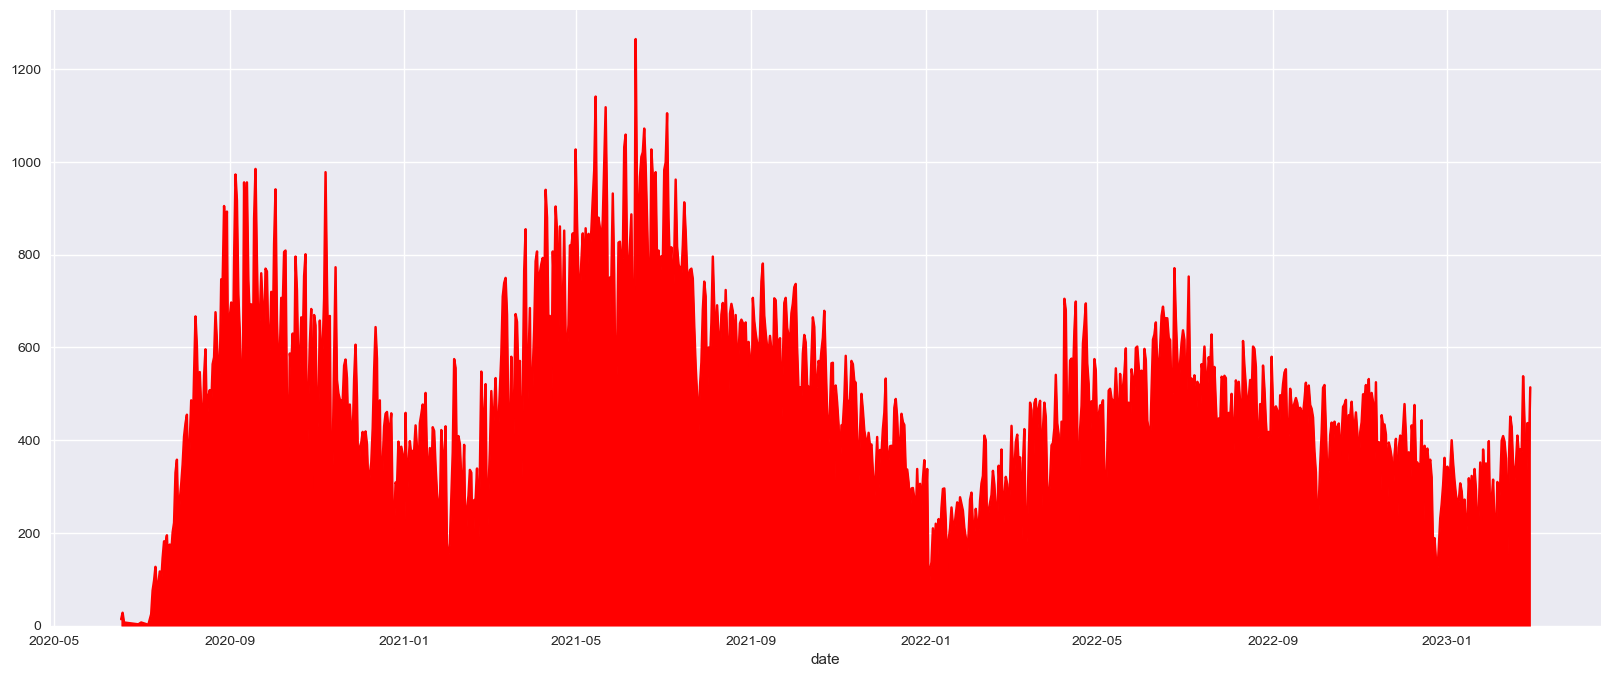

In [212]:
fig, axes = plt.subplots(1, 1, tight_layout=False, figsize = (20, 8))
#sns.histplot(x = df['date'], stat="count", color="Grey")

# groupby day, count and plot
g = result_with_two_decimals.groupby([result.date])["date"].count().plot.area(color="red")
#g2 = resresult_with_two_decimalsult[(result_with_two_decimals.started_at >= "2020-06-15 12:00:00") & (result['filter'] == 0)].groupby([result.started_at.dt.year, result.started_at.dt.day_of_year])["started_at"].count().plot.area(color="blue").plot(ax=g.twinx())
#plt.xticks(rotation=90)


## What the heck are these ids?
trying to cast start_station_ids into a integer causes an error since there are two entries the station_id MTL-ECO5-03

In [143]:
a = pd.to_numeric(result.end_station_id, errors='coerce')
idx = a.isna()
result[idx]

,duration,started_at,ended_at,start_station_id,start_station_name,end_station_id,end_station_name,Bike number,member_casual,date,start_lat,start_lng,end_lat,end_lng,distance,speed,ride_id,rideable_type,filter
26594289,2477.0,2020-04-19 21:26:00,2020-04-19 22:07:17,31506,1st & Rhode Island Ave NW,NaN,NaN,NaN,member,2020-04-19,38.915417,-77.012289,38.900930,-77.018677,1.703071,2.475194,1A40A2FFC81071C3,docked_bike,0
26594290,986.0,2020-04-20 09:03:25,2020-04-20 09:19:51,31007,Crystal City Metro / 18th St & S Bell St,NaN,NaN,NaN,member,2020-04-20,38.857405,-77.051132,38.900930,-77.018677,5.596047,20.431816,59F67395087E3EE3,docked_bike,0
26594291,566.0,2020-04-06 08:44:40,2020-04-06 08:54:06,31212,New Hampshire Ave & Ward Pl NW,NaN,NaN,NaN,member,2020-04-06,38.905711,-77.047318,38.900930,-77.018677,2.534758,16.122135,3A580801EEAB8613,docked_bike,0
26594294,2050.0,2020-04-12 16:22:56,2020-04-12 16:57:06,31500,4th & W St NE,NaN,NaN,NaN,member,2020-04-12,38.919077,-77.000648,38.900930,-77.018677,2.550526,4.478972,14A5C19D4A941041,docked_bike,0
26594295,21.0,2020-04-12 16:57:10,2020-04-12 16:57:31,31500,4th & W St NE,NaN,NaN,NaN,member,2020-04-12,38.919077,-77.000648,38.900930,-77.018677,2.550526,437.232950,B040F5E81C378018,docked_bike,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34876962,529392.0,2023-02-09 02:34:31,2023-02-15 05:37:43,32416.0,Chillum Rd & Riggs Rd / Riggs Plaza,NaN,NaN,NaN,casual,2023-02-09,38.961737,-76.995922,38.900000,-77.040000,7.852564,0.053399,F7D8777F5F77A008,docked_bike,0
34876983,541642.0,2023-02-09 02:32:41,2023-02-15 09:00:03,32416.0,Chillum Rd & Riggs Rd / Riggs Plaza,NaN,NaN,NaN,casual,2023-02-09,38.961737,-76.995922,38.814577,-77.052808,17.088113,0.113575,D522AA096FDF9002,docked_bike,0
34876997,89995.0,2023-02-24 17:50:31,2023-02-25 18:50:26,31298.0,15th & M St NW,NaN,NaN,NaN,member,2023-02-24,38.905424,-77.034674,38.890000,-77.020000,2.134025,0.085366,A28F3781C5E9B951,classic_bike,0
34876999,90001.0,2023-02-04 11:54:26,2023-02-05 12:54:27,31271.0,Constitution Ave & 2nd St NW/DOL,NaN,NaN,NaN,casual,2023-02-04,38.892275,-77.013917,38.921074,-77.031887,3.559847,0.142392,A8DF8B5134ACB65E,docked_bike,0


In [142]:
result.drop(result[result['start_station_id'] == "MTL-ECO5-03"].index, inplace=True)

In [145]:
result['start_station_id'] = result['start_station_id'].astype(int)

result['end_station_id'].fillna(value=0, inplace=True)
result['end_station_id'] = result['end_station_id'].astype(int)

# Generate output

In [21]:
result['member_casual'] = result.member_casual.str.lower()
test = result[(result.started_at > "2011-01-01 00:00:00")].groupby([result.date, result.started_at.dt.hour, result.member_casual])["start_station_id"].count().reset_index()

#df = test.reset_index()

# # Rename the columns
test.columns = ['date', 'started_at', 'member_casual', 'count']

# Pivot the table to get the desired output
pivot_df = pd.pivot_table(test, index=['date', 'started_at'], columns='member_casual', values='count', aggfunc=sum)
pivot_df = pivot_df.fillna(0)
# Add a column for the total count
pivot_df['total'] = pivot_df['casual'] + pivot_df['member']

# Reset the index and convert it to the desired format
output_df = pivot_df.reset_index()#.rename(columns={'Casual': 'casual', 'Member': 'member'})
output_df = output_df[['date', 'started_at', 'casual', 'member', 'total']]
output_df.columns = ['dteday', 'hr', 'casual', 'registered', 'cnt']

output_df


,dteday,hr,casual,registered,cnt
0,2011-01-01,0,3.0,13.0,16.0
1,2011-01-01,1,8.0,30.0,38.0
2,2011-01-01,2,5.0,26.0,31.0
3,2011-01-01,3,3.0,9.0,12.0
4,2011-01-01,4,0.0,1.0,1.0
...,...,...,...,...,...
106073,2023-02-28,19,141.0,416.0,557.0
106074,2023-02-28,20,112.0,306.0,418.0
106075,2023-02-28,21,67.0,189.0,256.0
106076,2023-02-28,22,58.0,153.0,211.0


In [22]:
#instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
output_df['dteday'] = pd.to_datetime(output_df['dteday'])
output_df['hr'] = pd.to_numeric(output_df['hr'].astype("int"))
output_df['casual'] = pd.to_numeric(output_df['casual'].astype("int"))
output_df['registered'] = pd.to_numeric(output_df['registered'].astype("int"))
output_df['cnt'] = pd.to_numeric(output_df['cnt'].astype("int"))
print(output_df.dtypes)
output_df.head()

dteday        datetime64[ns]
hr                     int32
casual                 int32
registered             int32
cnt                    int32
dtype: object


,dteday,hr,casual,registered,cnt
0,2011-01-01,0,3,13,16
1,2011-01-01,1,8,30,38
2,2011-01-01,2,5,26,31
3,2011-01-01,3,3,9,12
4,2011-01-01,4,0,1,1


In [23]:
output_df.to_csv("test.csv", sep=',')

In [24]:
result[(result.started_at >= "2011-01-01 00:00:00") & (result.started_at < "2011-01-01 01:00:00")]

,duration,started_at,ended_at,start_station_id,start_station_name,end_station_id,end_station_name,Bike number,member_casual,date,start_lat,start_lng,end_lat,end_lng,distance,speed,ride_id,rideable_type,filter
115586,3548.0,2011-01-01 00:01:29,2011-01-01 01:00:37,31620,5th & F St NW,31620,5th & F St NW,W00247,member,2011-01-01,38.897222,-77.019347,38.897222,-77.019347,0.000000,0.000000,NaN,NaN,0
115587,346.0,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,14th & Harvard St NW,31101,14th & V St NW,W00675,casual,2011-01-01,38.926800,-77.032200,38.917764,-77.032096,1.004742,10.453963,NaN,NaN,0
115588,563.0,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,Georgia & New Hampshire Ave NW,31104,Adams Mill & Columbia Rd NW,W00357,member,2011-01-01,38.936684,-77.024181,38.922925,-77.042581,2.207693,14.116687,NaN,NaN,0
115589,435.0,2011-01-01 00:09:21,2011-01-01 00:16:36,31111,10th & U St NW,31503,Florida Ave & R St NW,W00970,member,2011-01-01,38.917200,-77.025900,38.912600,-77.013500,1.188525,9.836072,NaN,NaN,0
115590,233.0,2011-01-01 00:28:26,2011-01-01 00:32:19,31104,Adams Mill & Columbia Rd NW,31106,Calvert & Biltmore St NW,W00346,casual,2011-01-01,38.922925,-77.042581,38.923203,-77.047637,0.438478,6.774773,NaN,NaN,0
115591,158.0,2011-01-01 00:32:33,2011-01-01 00:35:11,31605,3rd & D St SE,31618,4th & East Capitol St NE,W01033,member,2011-01-01,38.885100,-77.002300,38.889955,-77.000349,0.565645,12.888111,NaN,NaN,0
115592,561.0,2011-01-01 00:35:48,2011-01-01 00:45:09,31203,14th & Rhode Island Ave NW,31201,15th & P St NW,W00766,member,2011-01-01,38.908600,-77.032300,38.909868,-77.034421,0.231429,1.485106,NaN,NaN,0
115593,503.0,2011-01-01 00:36:42,2011-01-01 00:45:05,31203,14th & Rhode Island Ave NW,31201,15th & P St NW,W00506,member,2011-01-01,38.908600,-77.032300,38.909868,-77.034421,0.231429,1.656351,NaN,NaN,0
115594,449.0,2011-01-01 00:45:55,2011-01-01 00:53:24,31201,15th & P St NW,31202,14th & R St NW,W00506,member,2011-01-01,38.909868,-77.034421,38.913046,-77.032008,0.410444,3.290867,NaN,NaN,0
115595,442.0,2011-01-01 00:46:06,2011-01-01 00:53:28,31201,15th & P St NW,31202,14th & R St NW,W00766,member,2011-01-01,38.909868,-77.034421,38.913046,-77.032008,0.410444,3.342985,NaN,NaN,0


In [25]:
result[result['start_station_id']==31075]
display(result.loc[14795820])
print(len((str(result.loc[14795820]["end_lat"]).split("."))[1]))
print(len((str(result.loc[14795820]["end_lng"]).split("."))[1]))

duration                                              1176.0
started_at                               2016-10-19 15:02:50
ended_at                                 2016-10-19 15:22:26
start_station_id                                       31236
start_station_name    37th & O St NW / Georgetown University
end_station_id                                         31229
end_station_name                 New Hampshire Ave & T St NW
Bike number                                           W22921
member_casual                                         casual
date                                              2016-10-19
start_lat                                           38.90774
start_lng                                         -77.071652
end_lat                                            38.915544
end_lng                                           -77.038252
distance                                            3.017326
speed                                               9.236713
ride_id                 

6
6


In [26]:
print(result.describe())
print(result.dtypes)
result.count()

           duration     start_lat     start_lng       end_lat       end_lng  \
count  3.491005e+07  3.491004e+07  3.491004e+07  3.491005e+07  3.491005e+07   
mean   1.230981e+03  3.890143e+01 -7.703122e+01  3.890020e+01 -7.703064e+01   
std    2.410101e+04  1.850895e-01  3.643483e-01  1.895247e-01  3.732960e-01   
min   -1.743833e+06  0.000000e+00 -7.740000e+01  0.000000e+00 -7.756000e+01   
25%    4.040000e+02  3.889050e+01 -7.704478e+01  3.889050e+01 -7.704478e+01   
50%    6.920000e+02  3.890114e+01 -7.703230e+01  3.890071e+01 -7.703228e+01   
75%    1.189000e+03  3.891264e+01 -7.701767e+01  3.891010e+01 -7.701760e+01   
max    3.154903e+07  3.913000e+01  0.000000e+00  3.946000e+01  0.000000e+00   

           distance         speed      filter  
count  3.491004e+07  3.490972e+07  34910048.0  
mean   2.214916e+00           inf         0.0  
std    5.952643e+01           NaN         0.0  
min    0.000000e+00 -3.832010e+04         0.0  
25%    9.059971e-01  6.364658e+00         0.0  


duration              34910048
started_at            34910048
ended_at              34910048
start_station_id      34910048
start_station_name    34471254
end_station_id        34892289
end_station_name      34414173
Bike number           26593065
member_casual         34910048
date                  34910048
start_lat             34910038
start_lng             34910038
end_lat               34910048
end_lng               34910048
distance              34910038
speed                 34909724
ride_id                8316969
rideable_type          8316969
filter                34910048
dtype: int64

## Fix Durations > 1 year

In [27]:
# Fix Durations > 1 year
for index in result[result["duration"] > 30000000].index.values:
    display(result.iloc[[index-1, index, index+1]])
    result.loc[index, 'ended_at'] = result.loc[index, 'ended_at'] - pd.DateOffset(years=1)
    result.loc[index, 'duration'] = (result.loc[index, 'ended_at'] - result.loc[index, 'started_at']).total_seconds()
    display(result.iloc[[index]])

,duration,started_at,ended_at,start_station_id,start_station_name,end_station_id,end_station_name,Bike number,member_casual,date,start_lat,start_lng,end_lat,end_lng,distance,speed,ride_id,rideable_type,filter
26624386,3424.0,2020-04-13 18:34:08,2020-04-13 19:31:12,31044,King St & Patrick St,31903.0,Royal St & Wilkes St,NaN,casual,2020-04-13,38.805317,-77.049883,38.799267,-77.044700,0.808881,0.850459,0196526644192C9E,docked_bike,0
26624387,31549033.0,2020-04-16 11:34:16,2021-04-16 15:11:29,31271,Constitution Ave & 2nd St NW/DOL,32901.0,6035 Warehouse,NaN,casual,2020-04-16,38.892275,-77.013917,38.963810,-77.010266,7.960596,0.000908,6FA301B8C390ACE8,docked_bike,0
26624388,362800.0,2020-04-09 14:26:45,2020-04-13 19:13:25,31716,Kingman Island/The Fields at RFK,32901.0,6035 Warehouse,NaN,casual,2020-04-09,38.895955,-76.967845,38.963810,-77.010266,8.390096,0.083253,02B34B566C547A9F,docked_bike,0


,duration,started_at,ended_at,start_station_id,start_station_name,end_station_id,end_station_name,Bike number,member_casual,date,start_lat,start_lng,end_lat,end_lng,distance,speed,ride_id,rideable_type,filter
26624387,13033.0,2020-04-16 11:34:16,2020-04-16 15:11:29,31271,Constitution Ave & 2nd St NW/DOL,32901.0,6035 Warehouse,NaN,casual,2020-04-16,38.892275,-77.013917,38.96381,-77.010266,7.960596,0.000908,6FA301B8C390ACE8,docked_bike,0


In [28]:
result['date'] = pd.to_datetime(result['date'])
#result.head()

# Missing days 

In [29]:
result[(result.started_at >= "2016-01-22 19") & (result.started_at <= "2016-01-27 00")]
result.sort_values("date").tail()

,duration,started_at,ended_at,start_station_id,start_station_name,end_station_id,end_station_name,Bike number,member_casual,date,start_lat,start_lng,end_lat,end_lng,distance,speed,ride_id,rideable_type,filter
34739887,547.0,2023-02-28 18:09:44,2023-02-28 18:18:51,31229.0,New Hampshire Ave & T St NW,31109.0,7th St & Florida Ave NW,NaN,casual,2023-02-28,38.915544,-77.038252,38.916137,-77.022003,1.407371,9.262407,E542BCB818DDD863,classic_bike,0
34896013,485.0,2023-02-28 07:12:34,2023-02-28 07:20:39,31218.0,L'Enfant Plaza / 7th & C St SW,30200.0,9th St & Pennsylvania Ave NW,NaN,casual,2023-02-28,38.886266,-77.022241,38.894280,-77.023979,0.903723,6.708044,57A53F0B58A1C435,classic_bike,0
34771201,1249.0,2023-02-28 18:28:05,2023-02-28 18:48:54,31296.0,Columbia & Ontario Rd NW,31293.0,Thomas Jefferson St NW & Water/K St NW,NaN,member,2023-02-28,38.924088,-77.040787,38.902826,-77.060173,2.898766,8.355129,4C0F6C5AA3D93B2F,classic_bike,0
34759837,453.0,2023-02-28 13:58:19,2023-02-28 14:05:52,31509.0,New Jersey Ave & R St NW,31283.0,14th & L St NW,NaN,casual,2023-02-28,38.912659,-77.017669,38.903658,-77.031737,1.575896,12.523680,BDA9E7FEFE50B1E5,classic_bike,0
34868126,1268.0,2023-02-28 14:32:40,2023-02-28 14:53:48,31328.0,21st St & G st NW,31678.0,4th & O St SW,NaN,member,2023-02-28,38.898302,-77.046913,38.872964,-77.017585,3.792297,10.766773,9EC86E9AB7C6E28A,classic_bike,0


In [30]:
import pandas as pd

# Load your data into a pandas DataFrame
df = pd.DataFrame()

# Convert the 'date' column to a pandas datetime object
df['date'] = pd.to_datetime(result['date'])

# Set the 'date' column as the index
df.set_index('date', inplace=True)

# Resample the DataFrame to a daily time series with a frequency of one day
daily_df = df.resample('1D').sum()

# Check for missing days using the fillna() function
missing_days = daily_df.isna().any(axis=1)

# Print the missing days (if any)
if missing_days.any():
    print("Missing days:")
    print(missing_days[missing_days == True].index)
else:
    print("No missing days found.")


No missing days found.


In [31]:
# Convert the 'date' column to a pandas datetime object
df = pd.DataFrame()
df['date'] = result.sort_values("date")['date'].unique()

# Set the 'date' column as the index
df.set_index('date', inplace=True)

# # Resample the DataFrame to a daily time series with a frequency of one day
# daily_df = df.resample('1D').count()
    
print(pd.date_range(start = result.date.min(), end = result.date.max() ).difference(df.index))


DatetimeIndex(['2016-01-23', '2016-01-24', '2016-01-25', '2016-01-26'], dtype='datetime64[ns]', freq=None)


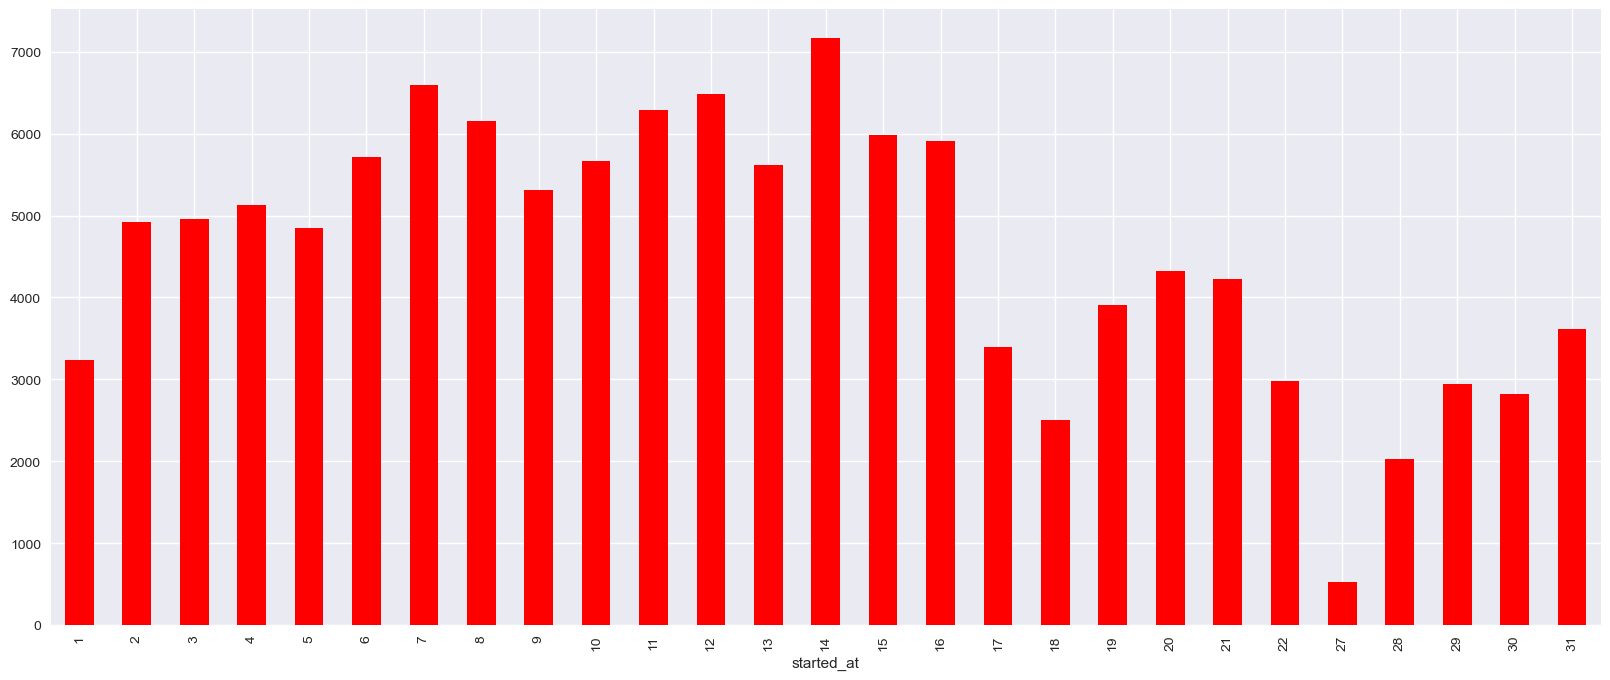

In [32]:
fig, axes = plt.subplots(1, 1, tight_layout=False, figsize = (20, 8))
#sns.histplot(x = df['date'], stat="count", color="Grey")

# groupby day, count and plot
g = result[(result.started_at >= "2016-01-01 00:00:00") & (result.started_at < "2016-02-01 01:00:00")].groupby([result.started_at.dt.day])["started_at"].count().plot.bar(color="red")


zcat 2016-capitalbikeshare-tripdata.zip | grep '^"[0-9]*","2016-01-2' | cut -d "," -f 2 | cut -d " " -f 1 | uniq -c
   4321 "2016-01-20
   4228 "2016-01-21
   2985 "2016-01-22
    528 "2016-01-27
   2022 "2016-01-28

## Fix 535 Durations > 1 Month between 2020-12-15 12:34:42 / 2020-12-15 13:21:55

In [33]:
#display((result[result["duration"] < -10000])[:1])
#display((result[(result["duration"] < -10000) & (result["duration"] < 0) & (result['date'] == "2020-12-15")]))

print("Count of trips with negative duration:", result[(result['date'] == "2020-12-15") & (result["duration"] < 0)]["date"].count())

print("Count of trips at 2020-12-15:", result[result.date == "2020-12-15"]["date"].count())
print("Count of trips at 2020-11-25:", result[result.date == "2020-11-25"]["date"].count())

print("Min/Max of started_at:", result[result["duration"] < -100000]["started_at"].min(), "/",  result[result["duration"] < -100000]["started_at"].max())
print("Min/Max of ended_at:", result[result["duration"] < -100000]["ended_at"].min(), "/",  result[result["duration"] < -100000]["ended_at"].max())

print("Count of trips in the same time period:", result[(result.started_at >= "2020-12-15 12:34:42") & (result.started_at <= "2020-12-15 13:21:55")]["date"].count())
print("Count of trips in the same time period with positive duration:", result[(result.started_at >= "2020-12-15 12:34:42") & (result.started_at <= "2020-12-15 13:21:55") & (result.duration > 0)]["date"].count())
print("Count of trips the next week in the same time period:", result[(result.started_at >= "2020-12-22 12:34:42") & (result.started_at <= "2020-12-22 13:21:55")]["date"].count())
print("Count of trips the previous week in the same time period:", result[(result.started_at >= "2020-12-08 12:34:42") & (result.started_at <= "2020-12-08 13:21:55")]["date"].count())

display("Trips with negative duration in the time period:", result[(result.started_at >= "2020-12-15 12:34:42") & (result.started_at <= "2020-12-15 13:21:55") & (result.duration < 0)].sort_values("started_at"))
display("Trips with positive duration in the time period:", result[(result.started_at >= "2020-12-15 12:34:42") & (result.started_at <= "2020-12-15 13:21:55") & (result.duration > 0)].sort_values("started_at"))



Count of trips with negative duration: 535
Count of trips at 2020-12-15: 4106
Count of trips at 2020-11-25: 4164
Min/Max of started_at: 2020-12-15 12:34:42 / 2020-12-15 13:21:55
Min/Max of ended_at: 2020-11-25 08:42:10 / 2020-11-26 00:28:12
Count of trips in the same time period: 758
Count of trips in the same time period with positive duration: 223
Count of trips the next week in the same time period: 198
Count of trips the previous week in the same time period: 162


'Trips with negative duration in the time period:'

,duration,started_at,ended_at,start_station_id,start_station_name,end_station_id,end_station_name,Bike number,member_casual,date,start_lat,start_lng,end_lat,end_lng,distance,speed,ride_id,rideable_type,filter
28208758,-1741952.0,2020-12-15 12:34:42,2020-11-25 08:42:10,31019.0,Wilson Blvd & N Edgewood St,31246.0,M St & Pennsylvania Ave NW,NaN,casual,2020-12-15,38.888982,-77.092489,38.905122,-77.056875,3.566510,-0.007371,953B02D16A222770,electric_bike,0
28256826,-1739878.0,2020-12-15 12:34:45,2020-11-25 09:16:47,31282.0,16th & R St NW,31125.0,15th & W St NW,NaN,member,2020-12-15,38.912652,-77.036278,38.919018,-77.034449,0.725392,-0.001501,F719D9984A98DE0F,docked_bike,0
28200614,-1741880.0,2020-12-15 12:34:51,2020-11-25 08:43:31,99999.0,NaN,31124.0,14th & Irving St NW,NaN,casual,2020-12-15,38.920000,-77.000000,38.928621,-77.032349,2.958046,-0.006113,C9B479CB559A627D,electric_bike,0
28225115,-1739998.0,2020-12-15 12:34:57,2020-11-25 09:14:59,31600.0,5th & K St NW,31262.0,11th & F St NW,NaN,casual,2020-12-15,38.903040,-77.019027,38.897857,-77.026975,0.897331,-0.001857,34DA2AAC4B573269,docked_bike,0
28222271,-1734626.0,2020-12-15 12:34:59,2020-11-25 10:44:33,31708.0,Anacostia Ave & Benning Rd NE / River Terrace,31708.0,Anacostia Ave & Benning Rd NE / River Terrace,NaN,casual,2020-12-15,38.896544,-76.960120,38.896544,-76.960120,0.000000,-0.000000,CE1E4AECAA12B0B0,docked_bike,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28261621,-1721360.0,2020-12-15 13:21:42,2020-11-25 15:12:22,31611.0,13th & H St NE,31247.0,Jefferson Dr & 14th St SW,NaN,member,2020-12-15,38.900426,-76.988250,38.888553,-77.032427,4.044774,-0.008459,125145260FFFACF7,docked_bike,0
28184072,-1714006.0,2020-12-15 13:21:43,2020-11-25 17:14:57,31220.0,US Dept of State / Virginia Ave & 21st St NW,31266.0,11th & M St NW,NaN,member,2020-12-15,38.894785,-77.046570,38.905597,-77.027767,2.023099,-0.004249,7536464AF247ECC8,electric_bike,0
28193237,-1727088.0,2020-12-15 13:21:47,2020-11-25 13:36:59,99999.0,NaN,99999.0,NaN,NaN,member,2020-12-15,38.940000,-77.070000,38.900000,-77.050000,4.772489,-0.009948,EA87A9D0DDE53B91,electric_bike,0
28185915,-1729604.0,2020-12-15 13:21:48,2020-11-25 12:55:04,31612.0,D St & Maryland Ave NE,31616.0,3rd & H St NE,NaN,member,2020-12-15,38.894758,-76.997114,38.900412,-77.001949,0.755204,-0.001572,9BFF3351269C4B3B,docked_bike,0


'Trips with positive duration in the time period:'

,duration,started_at,ended_at,start_station_id,start_station_name,end_station_id,end_station_name,Bike number,member_casual,date,start_lat,start_lng,end_lat,end_lng,distance,speed,ride_id,rideable_type,filter
28180246,3.0,2020-12-15 12:34:55,2020-12-15 12:34:58,31603.0,1st & M St NE,31603.0,1st & M St NE,NaN,casual,2020-12-15,38.905697,-77.005483,38.905697,-77.005483,0.000000,0.000000,E1CCFEDBD9345EFA,classic_bike,0
28170367,1408.0,2020-12-15 12:35:00,2020-12-15 12:58:28,31524.0,Montello Ave & Holbrook Terr NE,31203.0,14th & Rhode Island Ave NW,NaN,member,2020-12-15,38.907444,-76.986813,38.908600,-77.032300,3.937948,10.068617,95E45E3A9CDA8E0A,classic_bike,0
28172582,252.0,2020-12-15 12:35:15,2020-12-15 12:39:27,31108.0,4th & M St SW,31628.0,1st & K St SE,NaN,member,2020-12-15,38.876697,-77.017898,38.878854,-77.005727,1.080466,15.435233,147425C83F7EBCAC,classic_bike,0
28218351,3907.0,2020-12-15 12:35:17,2020-12-15 13:40:24,31658.0,Rosedale Rec Center,31607.0,13th & E St SE,NaN,member,2020-12-15,38.897808,-76.979634,38.882915,-76.987907,1.804130,1.662367,B3A14A3683B3B0AE,classic_bike,0
28183074,874.0,2020-12-15 12:35:23,2020-12-15 12:49:57,31027.0,Key Blvd & N Quinn St,31224.0,18th & L St NW,NaN,casual,2020-12-15,38.896323,-77.078445,38.903640,-77.042531,3.212636,13.232826,2CB5885A3DB58A6D,electric_bike,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28211130,1450.0,2020-12-15 13:21:00,2020-12-15 13:45:10,31220.0,US Dept of State / Virginia Ave & 21st St NW,31012.0,Clark St & 26th St S,NaN,casual,2020-12-15,38.894729,-77.046524,38.850634,-77.051393,4.921296,12.218391,CD6A6423B5667584,electric_bike,0
28270695,36.0,2020-12-15 13:21:02,2020-12-15 13:21:38,31044.0,King St & Patrick St,31044.0,King St & Patrick St,NaN,member,2020-12-15,38.805317,-77.049883,38.805317,-77.049883,0.000000,0.000000,0DF043AB30E1D918,classic_bike,0
28225820,259.0,2020-12-15 13:21:29,2020-12-15 13:25:48,31219.0,10th St & Constitution Ave NW,31227.0,13th St & New York Ave NW,NaN,member,2020-12-15,38.893028,-77.026013,38.900283,-77.029822,0.871467,12.113051,54E779FB37301483,classic_bike,0
28205432,1205.0,2020-12-15 13:21:37,2020-12-15 13:41:42,31421.0,Grant Circle,31627.0,3rd & M St NE,NaN,member,2020-12-15,38.942025,-77.018221,38.905470,-77.002130,4.296465,12.835911,5DABEE8B366B7FD7,classic_bike,0


### Visualisation

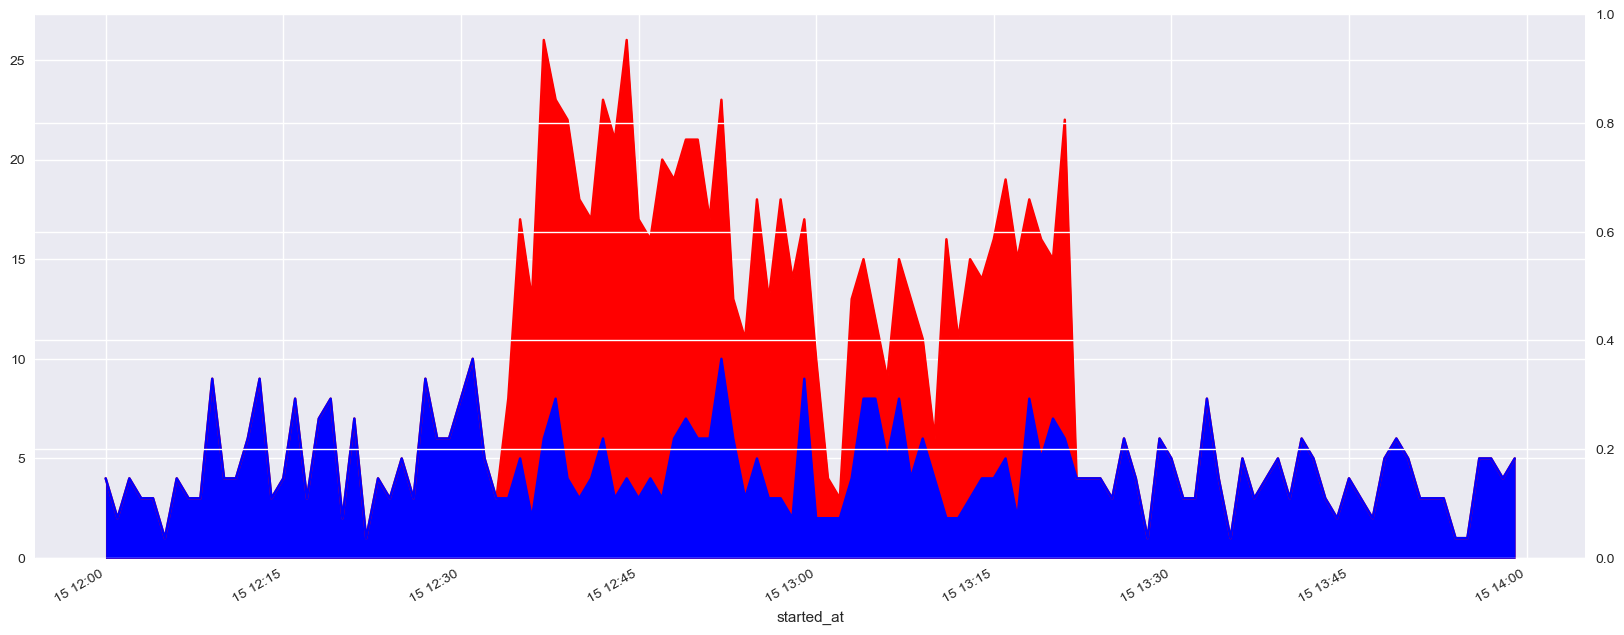

In [34]:
fig, axes = plt.subplots(1, 1, tight_layout=False, figsize = (20, 8))
#sns.histplot(x = df['date'], stat="count", color="Grey")

# groupby day, count and plot
g = result[(result.started_at >= "2020-12-15 12:00:00") & (result.started_at <= "2020-12-15 14:00:00")].groupby([result.started_at.dt.floor('Min')])["started_at"].count().plot.area(color="red")
g2 = result[(result.started_at >= "2020-12-15 12:00:00") & (result.started_at <= "2020-12-15 14:00:00") & (result.duration > 0)].groupby([result.started_at.dt.floor('Min')])["started_at"].count().plot.area(color="blue").plot(ax=g.twinx())
#plt.xticks(rotation=90)


### Remove all 535 entries

In [35]:
print(result.head())

   duration          started_at            ended_at start_station_id  \
0    1012.0 2010-09-20 11:27:04 2010-09-20 11:43:56            31208   
1      61.0 2010-09-20 11:41:22 2010-09-20 11:42:23            31209   
2    2690.0 2010-09-20 12:05:37 2010-09-20 12:50:27            31600   
3    1407.0 2010-09-20 12:06:05 2010-09-20 12:29:32            31600   
4    1414.0 2010-09-20 12:10:43 2010-09-20 12:34:17            31100   

              start_station_name end_station_id  \
0       M St & New Jersey Ave SE          31108   
1                 1st & N St  SE          31209   
2                  5th & K St NW          31100   
3                  5th & K St NW          31602   
4  19th St & Pennsylvania Ave NW          31201   

                end_station_name Bike number member_casual       date  \
0                  4th & M St SW      W00742        member 2010-09-20   
1                 1st & N St  SE      W00032        member 2010-09-20   
2  19th St & Pennsylvania Ave NW      W00

In [36]:
# # Check if there are any negative durations left that are larger than a month
# result = result[~((result.started_at >= "2020-12-15 12:00:00") & (result.started_at <= "2020-12-15 14:00:00") & (result.duration < 0))]
# display(result[result.duration < -10000])

# Create a new column 'filter' and set it to 1 if duration_sec > 86400, and 0 otherwise

prev = result[result['filter'] == 0].shape[0]
result['filter'] = (((result.started_at >= "2020-12-15 12:00:00") & (result.started_at <= "2020-12-15 14:00:00") & (result.duration < 0)) | (result['filter']==1)).astype(int)
print(f"Filtered {prev - result[result['filter'] == 0].shape[0]} lines because duration < 0")


Filtered 535 lines because duration < 0


## Check negative durations

In [37]:
display(result[(result["duration"] > -100000) & (result["duration"] < 0)])
# display(result[(result["duration"] > -100000) & (result["duration"] < 0) & (result['start_station_id'] == 31281.0 ) & (result["end_station_id"] == 31505.0)].duration.mean())
# print("started_at Min:", result[(result["duration"] > -100000) & (result["duration"] < 0) & (result["end_station_id"] == 31505.0)]["started_at"].min())
# print("started_at Max:", result[(result["duration"] > -100000) & (result["duration"] < 0) & (result["end_station_id"] == 31505.0)]["started_at"].max())
# print("ended_at Min:", result[(result["duration"] > -100000) & (result["duration"] < 0) & (result["end_station_id"] == 31505.0)]["ended_at"].min())
# print("ended_at Max:", result[(result["duration"] > -100000) & (result["duration"] < 0) & (result["end_station_id"] == 31505.0)]["ended_at"].max())
# print("start_station_ids:", result[(result["duration"] > -100000) & (result["duration"] < 0) & (result["end_station_id"] == 31505.0)]["start_station_id"].value_counts())

# for x in result[(result["duration"] > -100000) & (result["duration"] < 0)].groupby(['start_station_id']):
#     print('start_station_id:', x[0], '/ Count:', len(x[1]), 'Mean:', x[1]['duration'].mean(), 'Min:', x[1]['duration'].min(), 'Max:', x[1]['duration'].max())

# for x in result[(result["duration"] > -100000) & (result["duration"] < 0)].groupby(['end_station_id']):
#     print('end_station_id:', x[0], '/ Count:', len(x[1]), 'Mean:', x[1]['duration'].mean(), 'Min:', x[1]['duration'].min(), 'Max:', x[1]['duration'].max())

,duration,started_at,ended_at,start_station_id,start_station_name,end_station_id,end_station_name,Bike number,member_casual,date,start_lat,start_lng,end_lat,end_lng,distance,speed,ride_id,rideable_type,filter
26668817,-16.0,2020-05-24 18:58:35,2020-05-24 18:58:19,31406,14th & Upshur St NW,31505.0,Eckington Pl & Q St NE,NaN,member,2020-05-24,38.942475,-77.032678,38.910972,-77.004950,4.245473,-955.231392,7741E79C751B7926,docked_bike,0
26668941,-13.0,2020-05-30 13:17:14,2020-05-30 13:17:01,31268,12th & U St NW,31505.0,Eckington Pl & Q St NE,NaN,member,2020-05-30,38.916787,-77.028139,38.910972,-77.004950,2.107927,-583.733705,33DC5D203FA43705,docked_bike,0
26669008,-13.0,2020-05-25 14:59:49,2020-05-25 14:59:36,31202,14th & R St NW,31505.0,Eckington Pl & Q St NE,NaN,member,2020-05-25,38.913046,-77.032008,38.910972,-77.004950,2.352445,-651.446344,6E38B3180C7CE430,docked_bike,0
26669055,-13.0,2020-05-19 14:49:41,2020-05-19 14:49:28,31616,3rd & H St NE,31505.0,Eckington Pl & Q St NE,NaN,member,2020-05-19,38.900412,-77.001949,38.910972,-77.004950,1.202589,-333.024660,6B0B820C0A891D00,docked_bike,0
26669058,-12.0,2020-05-27 20:06:18,2020-05-27 20:06:06,31603,1st & M St NE,31505.0,Eckington Pl & Q St NE,NaN,member,2020-05-27,38.905700,-77.005600,38.910972,-77.004950,0.588911,-176.673429,6A3FB558399C737D,docked_bike,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34705520,-1.0,2023-02-19 17:56:26,2023-02-19 17:56:25,31600.0,5th & K St NW,31600.0,5th & K St NW,NaN,member,2023-02-19,38.903040,-77.019027,38.903040,-77.019027,0.000000,-0.000000,3FEDCD9A4D6C7A85,classic_bike,0
34817031,-277.0,2023-02-14 19:26:12,2023-02-14 19:21:35,99999.0,NaN,31251.0,12th & L St NW,NaN,member,2023-02-14,38.900000,-77.030000,38.903819,-77.028400,0.446655,-5.804897,D8CF74DA1DAE4D9B,electric_bike,0
34839988,-148.0,2023-02-28 15:07:27,2023-02-28 15:04:59,99999.0,NaN,31651.0,11th & Park Rd NW,NaN,member,2023-02-28,38.930000,-77.030000,38.931322,-77.028247,0.211173,-5.136630,C5E2D3B25F96AB2D,electric_bike,0
34871761,-299.0,2023-02-11 17:16:35,2023-02-11 17:11:36,99999.0,NaN,31087.0,Monroe Ave & Leslie Ave,NaN,casual,2023-02-11,38.820000,-77.050000,38.820932,-77.053096,0.287542,-3.462047,CC6CA11442981569,electric_bike,0


In [38]:
print(len(result[(result["duration"] > -10000) & (result.duration < 0)]['duration']))
#result[(result["duration"] > -10000)]
result[(result["duration"] > -10000) & (result.duration < 0)].groupby("date")["duration"].sum().min()

7076


-141520.0

In [39]:

print("started_at min:", result[(result["duration"] > -100000) & (result.duration < -60) & (result.started_at >= "2020-11-14 00:34:41")  & (result.started_at <= "2020-11-15 00:34:41") ]["started_at"].min())
print("started_at max:", result[(result["duration"] > -100000) & (result.duration < -60) & (result.started_at >= "2020-11-14 00:34:41")  & (result.started_at <= "2020-11-15 00:34:41") ]["started_at"].max())
print("Total trips in that time period:", result[(result.started_at >= "2020-11-14 13:00:07")  & (result.started_at <= "2020-11-14 16:53:43") ].sort_values("duration").shape[0])
print("Total trips with negative duration:", result[(result.duration < -60) & (result.started_at >= "2020-11-14 13:00:07")  & (result.started_at <= "2020-11-14 16:53:43") ].sort_values("duration").shape[0])

started_at min: 2020-11-14 13:00:07
started_at max: 2020-11-14 16:53:43
Total trips in that time period: 4047
Total trips with negative duration: 56


In [40]:
result[(result["duration"] > -100000) & (result.duration < -60) & (result.started_at >= "2020-11-14 13:00:07")  & (result.started_at <= "2020-11-14 16:53:43") ].sort_values("duration")

,duration,started_at,ended_at,start_station_id,start_station_name,end_station_id,end_station_name,Bike number,member_casual,date,start_lat,start_lng,end_lat,end_lng,distance,speed,ride_id,rideable_type,filter
28065330,-2689.0,2020-11-14 15:11:04,2020-11-14 14:26:15,31618.0,4th & East Capitol St NE,31229.0,New Hampshire Ave & T St NW,NaN,casual,2020-11-14,38.889955,-77.000349,38.915544,-77.038252,4.342082,-5.813126,F33F8F78579204C1,docked_bike,0
28121960,-2682.0,2020-11-14 15:11:01,2020-11-14 14:26:19,31295.0,Potomac & M St NW,NaN,NaN,NaN,member,2020-11-14,38.905368,-77.065149,38.917764,-77.032096,3.174697,-4.261338,C5DE2E9ED3BAAE0D,docked_bike,0
28039881,-675.0,2020-11-14 13:16:30,2020-11-14 13:05:15,31708.0,Anacostia Ave & Benning Rd NE / River Terrace,31518.0,New York Ave & Hecht Ave NE,NaN,casual,2020-11-14,38.896544,-76.960120,38.915604,-76.983683,2.940888,-15.684736,C2FB2F3EF1E08892,docked_bike,0
28005601,-665.0,2020-11-14 13:16:30,2020-11-14 13:05:25,31035.0,N Quincy St & Glebe Rd,31024.0,Virginia Square Metro / Monroe St & 9th St N,NaN,casual,2020-11-14,38.876393,-77.107735,38.882788,-77.103148,0.814436,-4.408977,9A81941E87D6043E,docked_bike,0
28004861,-146.0,2020-11-14 15:13:51,2020-11-14 15:11:25,31318.0,Connecticut Ave & Yuma St NW,31296.0,Columbia & Ontario Rd NW,NaN,casual,2020-11-14,38.947156,-77.065115,38.924088,-77.040787,3.317702,-81.806345,D4468D4C6EC6ACA6,docked_bike,0
28092143,-143.0,2020-11-14 15:13:53,2020-11-14 15:11:30,31280.0,11th & S St NW,31126.0,11th & Girard St NW,NaN,member,2020-11-14,38.913761,-77.027025,38.925636,-77.027112,1.320461,-33.242380,EDC422B40FA18394,docked_bike,0
28092146,-141.0,2020-11-14 15:13:49,2020-11-14 15:11:28,31280.0,11th & S St NW,31126.0,11th & Girard St NW,NaN,member,2020-11-14,38.913761,-77.027025,38.925636,-77.027112,1.320461,-33.713903,68A16784BD51559A,docked_bike,0
28109767,-140.0,2020-11-14 15:13:44,2020-11-14 15:11:24,31289.0,Henry Bacon Dr & Lincoln Memorial Circle NW,31273.0,Hains Point/Buckeye & Ohio Dr SW,NaN,casual,2020-11-14,38.890539,-77.049383,38.878433,-77.030230,2.135498,-54.912814,01E8958C890AA0EE,docked_bike,0
28070803,-140.0,2020-11-14 15:13:55,2020-11-14 15:11:35,31214.0,17th & Corcoran St NW,31266.0,11th & M St NW,NaN,member,2020-11-14,38.912100,-77.038700,38.905578,-77.027313,1.223361,-31.457852,6DE5DA0DA6348558,docked_bike,0
28155959,-139.0,2020-11-14 15:13:55,2020-11-14 15:11:36,31015.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31289.0,Henry Bacon Dr & Lincoln Memorial Circle NW,NaN,casual,2020-11-14,38.894600,-77.072305,38.890539,-77.049383,2.034546,-52.693277,D3CC256ADDE94415,docked_bike,0


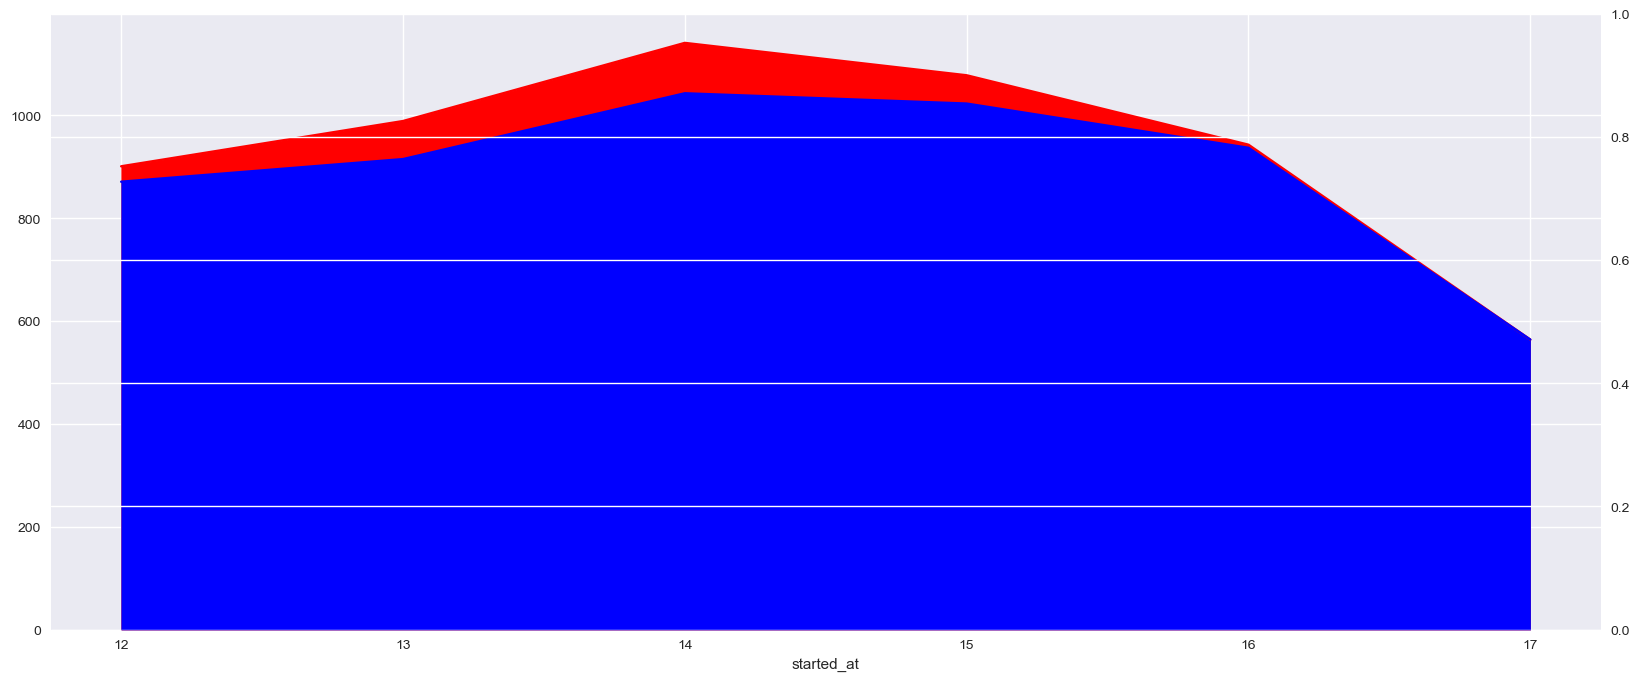

In [41]:
fig, axes = plt.subplots(1, 1, tight_layout=False, figsize = (20, 8))
g = result[(result.started_at >= "2020-11-14 12:00:07") & (result.started_at <= "2020-11-14 17:53:43")].groupby([result.started_at.dt.hour])["started_at"].count().plot.area(color="red")
g2 = result[(result.started_at >= "2020-11-14 12:00:07") & (result.started_at <= "2020-11-14 17:53:43") & (result.duration > 0)].groupby([result.started_at.dt.hour])["started_at"].count().plot.area(color="blue").plot(ax=g.twinx())
#plt.xticks(rotation=90)


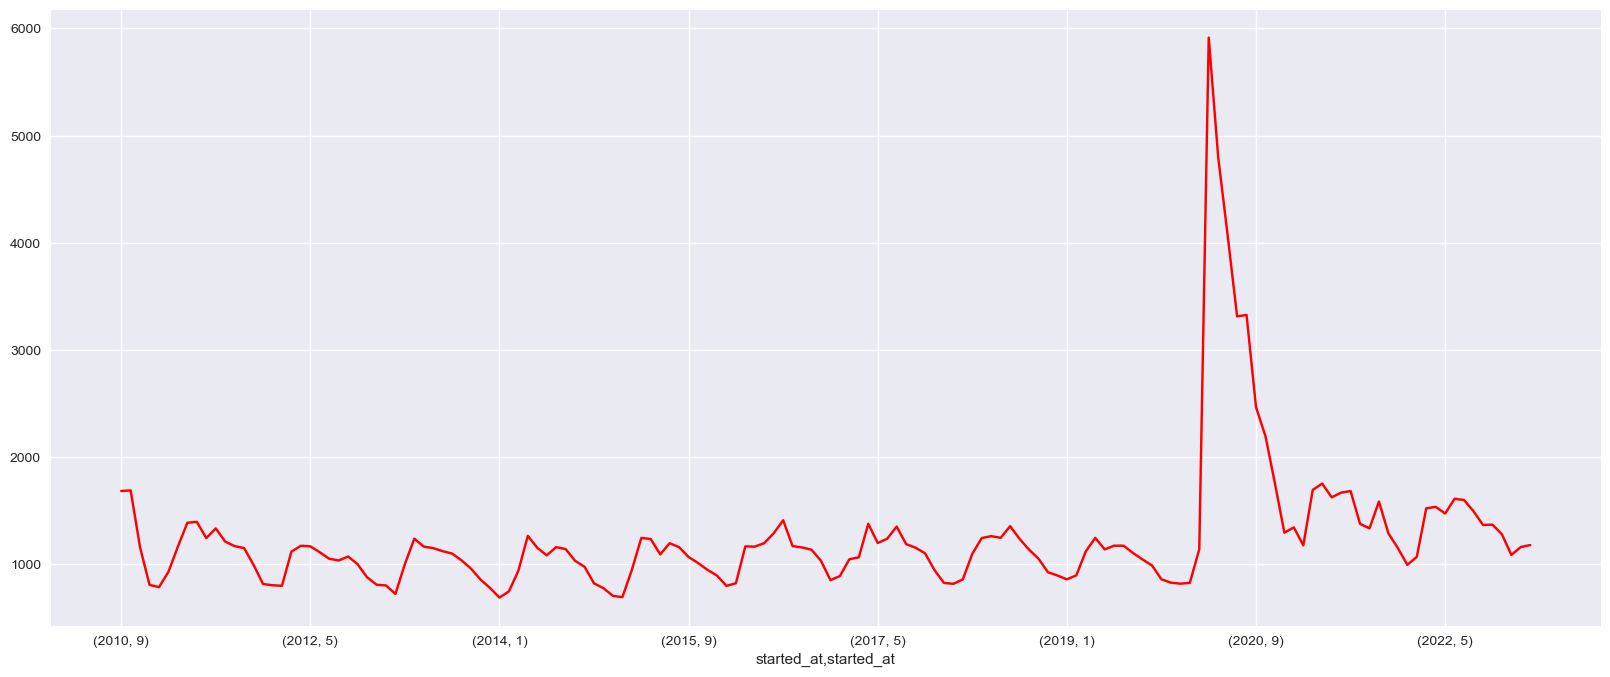

In [42]:
fig, axes = plt.subplots(1, 1, tight_layout=False, figsize = (20, 8))
g = result[(result["filter"] == 0)].groupby([result.started_at.dt.year, result.started_at.dt.month])["duration"].mean().plot.line(color="red")
# sn.boxplot(data=result,y="count",x="hour",orient="v")
#fig.set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
#g2 = result[(result.started_at >= "2020-04-06 11:39:46") & (result.started_at <= "2020-12-14 14:34:41") & (result["end_station_id"] == 31505.0) & (result.duration < 0)].groupby([result.started_at.dt.weekofyear])["started_at"].count().plot.line(color="blue").plot(ax=g.twinx())
#plt.xticks(rotation=90)


In [43]:
result[(result["filter"] == 0)].groupby([result.started_at.dt.year, result.started_at.dt.month])["duration"].mean().sort_values()

started_at  started_at
2014        1              688.878341
2015        2              692.807839
            1              704.686283
2013        2              723.048430
2014        2              746.557995
                             ...     
2020        7             3313.032161
            8             3326.239037
            6             4069.474112
            5             4799.086054
            4             5914.755384
Name: duration, Length: 150, dtype: float64

<AxesSubplot:xlabel='started_at'>

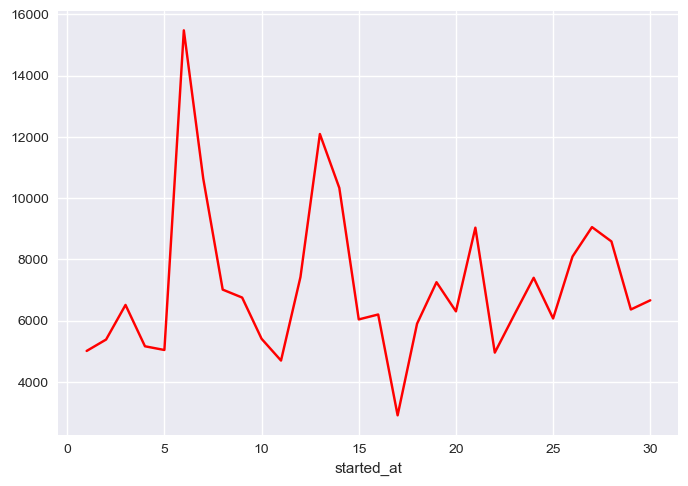

In [44]:
result[(result.started_at.dt.year == 2020) & (result.started_at.dt.month == 6)].groupby(result.started_at.dt.day)["duration"].count().plot.line(color="red")

In [45]:
result[(result.started_at > "2014-02-01 00:00:00") & (result.started_at < "2015-02-01 00:00:00")]

,duration,started_at,ended_at,start_station_id,start_station_name,end_station_id,end_station_name,Bike number,member_casual,date,start_lat,start_lng,end_lat,end_lng,distance,speed,ride_id,rideable_type,filter
6038983,925.0,2014-02-01 00:00:01,2014-02-01 00:15:26,31636,New Jersey Ave & N St NW/Dunbar HS,31200,Massachusetts Ave & Dupont Circle NW,W21505,member,2014-02-01,38.907333,-77.015360,38.910100,-77.044400,2.531452,9.852136,NaN,NaN,0
6038984,720.0,2014-02-01 00:00:31,2014-02-01 00:12:31,31102,11th & Kenyon St NW,31241,Thomas Circle,W01049,member,2014-02-01,38.929464,-77.027822,38.905900,-77.032500,2.651270,13.256348,NaN,NaN,0
6038985,262.0,2014-02-01 00:00:38,2014-02-01 00:05:00,31612,D St & Maryland Ave NE,31611,13th & H St NE,W00602,member,2014-02-01,38.894758,-76.997114,38.900427,-76.988250,0.992846,13.642157,NaN,NaN,0
6038986,181.0,2014-02-01 00:01:10,2014-02-01 00:04:11,31508,Gallaudet / 8th St & Florida Ave NE,31627,3rd & M St NE,W01393,member,2014-02-01,38.905090,-76.994100,38.905470,-77.002130,0.696158,13.846244,NaN,NaN,0
6038987,154.0,2014-02-01 00:01:49,2014-02-01 00:04:23,31001,18th & Eads St.,31013,Eads & 22nd St S,W20563,member,2014-02-01,38.857250,-77.053320,38.854381,-77.053412,0.319171,7.461134,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8966597,1087.0,2015-01-31 23:54:49,2015-02-01 00:12:56,31230,Metro Center / 12th & G St NW,31115,Columbia Rd & Georgia Ave NW,W00419,member,2015-01-31,38.898364,-77.027869,38.928121,-77.023795,3.327565,11.020454,NaN,NaN,0
8966598,363.0,2015-01-31 23:56:23,2015-02-01 00:02:26,31116,California St & Florida Ave NW,31117,15th & Euclid St NW,W20659,member,2015-01-31,38.917761,-77.040620,38.923330,-77.035200,0.776740,7.703204,NaN,NaN,0
8966599,711.0,2015-01-31 23:58:37,2015-02-01 00:10:28,31228,8th & H St NW,31212,21st & M St NW,W00472,member,2015-01-31,38.899700,-77.023086,38.905711,-77.047318,2.200790,11.143239,NaN,NaN,0
8966600,452.0,2015-01-31 23:59:23,2015-02-01 00:06:55,31615,6th & H St NE,31622,13th & D St NE,W01446,member,2015-01-31,38.899972,-76.998347,38.894832,-76.987633,1.089191,8.674975,NaN,NaN,0


# Filters

In [46]:
# Create a new column 'filter' and set it to 1 if duration_sec > 86400, and 0 otherwise
prev = result[result['filter'] == 0].shape[0]
result['filter'] = ((result['duration'] > 86400) | (result['filter']==1)).astype(int)
print(f"Filtered {prev - result[result['filter'] == 0].shape[0]} lines because duration > 86400")

Filtered 12589 lines because duration > 86400


In [47]:
# Create a new column 'filter' and set it to 1 if duration_sec > 86400, and 0 otherwise
prev = result[result['filter'] == 0].shape[0]
result['filter'] = ((result['duration'] < 0) | (result['filter']==1)).astype(int)
print(f"Filtered {prev - result[result['filter'] == 0].shape[0]} lines because duration < 0")


Filtered 7076 lines because duration < 0


In [48]:
prev = result[result['filter'] == 0].shape[0]
result['filter'] = ((result['duration'] < 60) | (result['filter'] == 1)).astype(int)
print(f"Filtered {prev - result[result['filter'] == 0].shape[0]} lines because duration < 60")

Filtered 114890 lines because duration < 60


In [49]:
prev = result[result['filter'] == 0].shape[0]
result['filter'] = ((result.start_lat == 0) | (result.end_lat == 0) | (result['filter'] == 1)).astype(int)
print(f"Filtered {prev - result[result['filter'] == 0].shape[0]} lines Latitude and Longitude are 0")

Filtered 1576 lines because duration < 60


In [50]:
prev = result[result['filter'] == 0].shape[0]
result['filter'] = ((result.speed >= 30) | (result['filter'] == 1)).astype(int)
print(f"Filtered {prev - result[result['filter'] == 0].shape[0]} lines because speed > 30")

Filtered 17926 lines because speed > 30


In [203]:
prev = result[result['filter'] == 0].shape[0]
result['filter'] = ((result.start_station_id == 0) | (result['filter'] == 1)).astype(int)
print(f"Filtered {prev - result[result['filter'] == 0].shape[0]} lines because start_station_id was NaN")

Filtered 763 lines because start_station_id was NaN


In [146]:
prev = result[result['filter'] == 0].shape[0]
result['filter'] = ((result.end_station_id == 0) | (result['filter'] == 1)).astype(int)
print(f"Filtered {prev - result[result['filter'] == 0].shape[0]} lines because end_station_id was NaN")

Filtered 18560 lines because end_station_id was NaN


In [220]:
prev = result[result['filter'] == 0].shape[0]
result['filter'] = ((result.start_lat == 0) | (result.start_lng == 0) | (result['filter'] == 1)).astype(int)
print(f"Filtered {prev - result[result['filter'] == 0].shape[0]} lines because start_lag or start_lng was 0.0")

Filtered 0 lines because start_lag or start_lng was 0.0


In [219]:
prev = result[result['filter'] == 0].shape[0]
result['filter'] = ((result.end_lat == 0) | (result.end_lng == 0) | (result['filter'] == 1)).astype(int)
print(f"Filtered {prev - result[result['filter'] == 0].shape[0]} lines because end_lag or end_lng was 0.0")

Filtered 14 lines because end_lag or end_lng was 0.0


In [70]:
result[(result['filter'] == 0) & (result['start_station_id'] == result['end_station_id']) & (result['duration'] < 300)]

,duration,started_at,ended_at,start_station_id,start_station_name,end_station_id,end_station_name,Bike number,member_casual,date,start_lat,start_lng,end_lat,end_lng,distance,speed,ride_id,rideable_type,filter
1,61.0,2010-09-20 11:41:22,2010-09-20 11:42:23,31209,1st & N St SE,31209,1st & N St SE,W00032,Member,2010-09-20,38.874300,-77.005700,38.874300,-77.005700,0.000000,0.00000,NaN,NaN,0
12,88.0,2010-09-20 12:31:18,2010-09-20 12:32:46,31602,Park Rd & Holmead Pl NW,31602,Park Rd & Holmead Pl NW,W00472,Member,2010-09-20,38.930800,-77.031500,38.930800,-77.031500,0.000000,0.00000,NaN,NaN,0
38,128.0,2010-09-20 15:08:24,2010-09-20 15:10:32,31603,1st & M St NE,31603,1st & M St NE,?(0x000000004752DD3A),Member,2010-09-20,38.905697,-77.005483,38.905697,-77.005483,0.000000,0.00000,NaN,NaN,0
150,68.0,2010-09-20 19:44:34,2010-09-20 19:45:42,31111,10th & U St NW,31111,10th & U St NW,W01050,Member,2010-09-20,38.917200,-77.025900,38.917200,-77.025900,0.000000,0.00000,NaN,NaN,0
173,205.0,2010-09-20 20:19:22,2010-09-20 20:22:47,31106,Calvert & Biltmore St NW,31106,Calvert & Biltmore St NW,W00796,Member,2010-09-20,38.923203,-77.047637,38.923203,-77.047637,0.000000,0.00000,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34904913,53.0,2023-02-07 17:14:07,2023-02-07 17:15:00,31631.0,8th & F St NE,31631.0,8th & F St NE,NaN,casual,2023-02-07,38.897219,-76.994682,38.897274,-76.994749,0.008397,0.57037,8077888643715B0E,electric_bike,0
34904948,10.0,2023-02-23 19:44:28,2023-02-23 19:44:38,31200.0,Massachusetts Ave & Dupont Circle NW,31200.0,Massachusetts Ave & Dupont Circle NW,NaN,member,2023-02-23,38.910100,-77.044400,38.910100,-77.044400,0.000000,0.00000,3B2158C0C464CAA0,classic_bike,0
34904954,5.0,2023-02-08 08:19:36,2023-02-08 08:19:41,31218.0,L'Enfant Plaza / 7th & C St SW,31218.0,L'Enfant Plaza / 7th & C St SW,NaN,member,2023-02-08,38.886266,-77.022241,38.886266,-77.022241,0.000000,0.00000,4B856A9F0F1C16B4,classic_bike,0
34907340,40.0,2023-02-10 16:00:40,2023-02-10 16:01:20,31623.0,Columbus Circle / Union Station,31623.0,Columbus Circle / Union Station,NaN,casual,2023-02-10,38.896960,-77.004930,38.896960,-77.004930,0.000000,0.00000,6F6E0A40A8C4774F,classic_bike,0


In [51]:
# display(result[result.speed == 500097.3545681862]) shows something liked swapped bikes but it doesn't makes sense at all
# are there more swapped bikes (ie swapped start_station_id and end_station_id but same duration?)
result[(result.duration == 64)].sort_values("speed").tail()
#result[(result.duration == 64) & (result.start_station_id != result.end_station_id) & ((result.start_station_id == 31024) | (result.end_station_id == 31024))]

,duration,started_at,ended_at,start_station_id,start_station_name,end_station_id,end_station_name,Bike number,member_casual,date,start_lat,start_lng,end_lat,end_lng,distance,speed,ride_id,rideable_type,filter
6742101,64.0,2014-05-15 18:33:42,2014-05-15 18:34:46,31024,Virginia Square Metro / N Monroe St & 9th St N,31033,Barcroft Community Center,W21628,member,2014-05-15,38.882788,-77.103148,38.850337,-77.100989,3.613273,203.246622,NaN,NaN,1
6206749,64.0,2014-03-10 19:21:24,2014-03-10 19:22:28,31024,Virginia Square Metro / N Monroe St & 9th St N,31033,Barcroft Community Center,W00137,member,2014-03-10,38.882788,-77.103148,38.850337,-77.100989,3.613273,203.246622,NaN,NaN,1
9291434,64.0,2015-04-04 09:45:35,2015-04-04 09:46:39,31033,Barcroft Community Center,31024,Virginia Square Metro / N Monroe St & 9th St N,W21596,member,2015-04-04,38.850337,-77.100989,38.882788,-77.103148,3.613273,203.246622,NaN,NaN,1
26101203,64.0,2020-01-09 10:49:06,2020-01-09 10:50:10,0,22nd & H NW (disabled),31257,22nd & I St NW / Foggy Bottom,W21430,member,2020-01-09,0.000000,0.000000,38.900880,-77.048911,8890.619637,500097.354568,NaN,NaN,1
26138445,64.0,2020-01-14 07:41:02,2020-01-14 07:42:06,31257,22nd & I St NW / Foggy Bottom,0,22nd & H NW (disabled),W21740,member,2020-01-14,38.900880,-77.048911,0.000000,0.000000,8890.619637,500097.354568,NaN,NaN,1


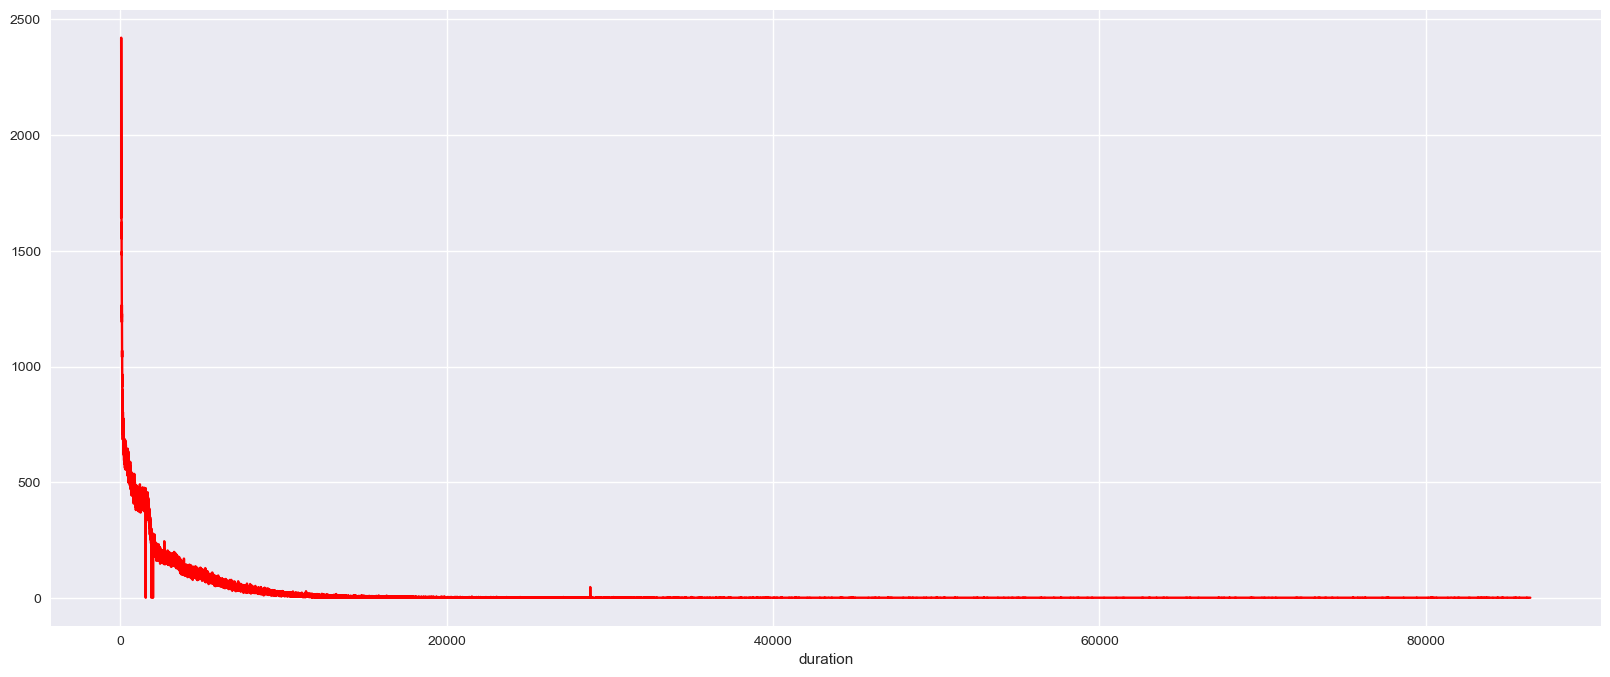

In [52]:
fig, axes = plt.subplots(1, 1, tight_layout=False, figsize = (20, 8))
g = result[(result.start_station_id == result.end_station_id) & (result['filter'] == 0)].groupby('duration')["duration"].count().plot.line(color="red")

# Amounts of available stations

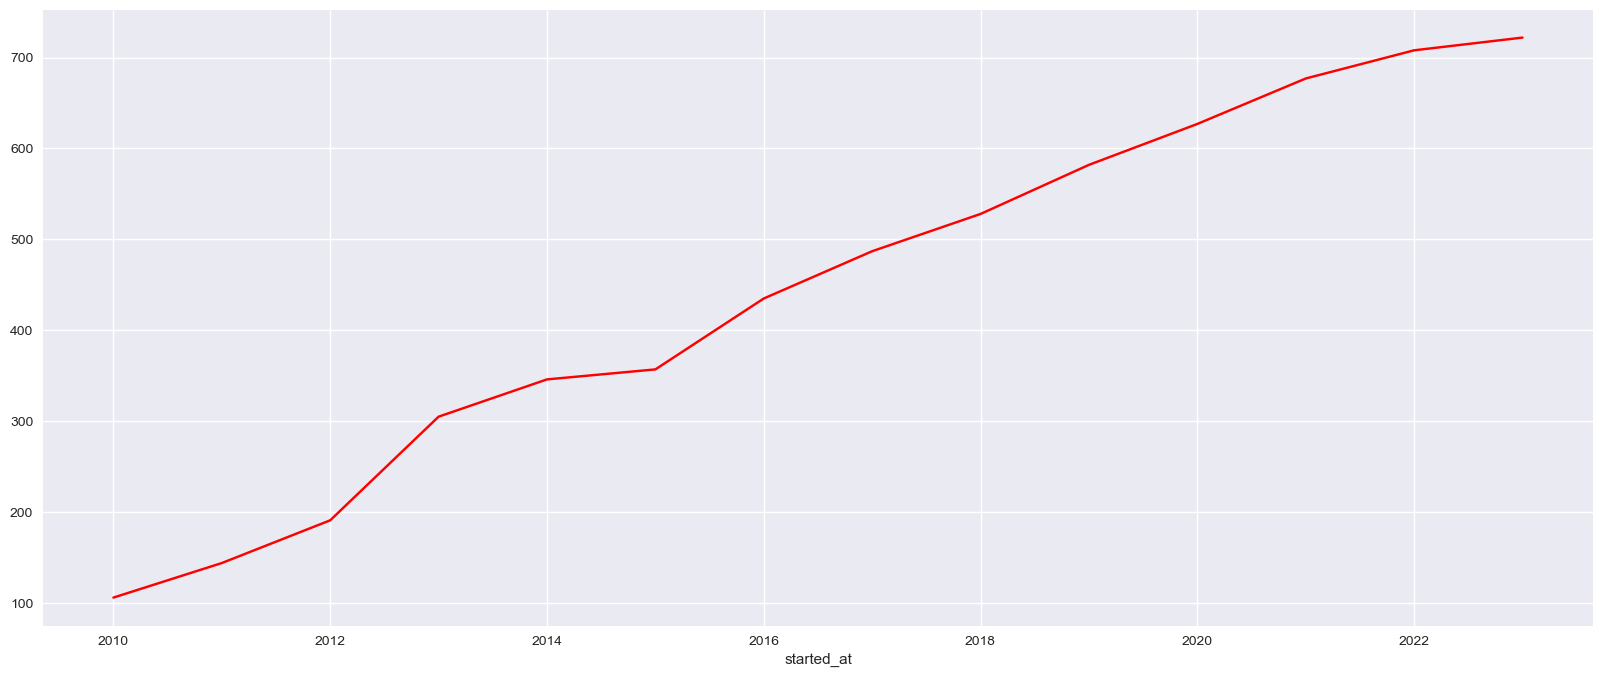

In [149]:
fig, axes = plt.subplots(1, 1, tight_layout=False, figsize = (20, 8))
g = result[(result['filter'] == 0)].groupby([result.started_at.dt.year])['start_station_id'].nunique().plot.line(color="red")
#g2 = result[(result.started_at >= "2020-04-06 11:39:46") & (result.started_at <= "2020-12-14 14:34:41") & (result["end_station_id"] == 31505.0) & (result.duration < 0)].groupby([result.started_at.dt.weekofyear])["started_at"].count().plot.line(color="blue").plot(ax=g.twinx())
#plt.xticks(rotation=90)


In [54]:
# Die letzte Zeitumstellung in Washington D.C. war am 6. November 2022 um 2:00 Uhr morgens, als die Uhren um eine Stunde zurückgestellt wurden, um die Winterzeit einzuleiten.
#result[(result.started_at >= "2020-12-15 12:00:00") & (result.started_at <= "2020-12-15 14:00:00")]
display(result[(result['started_at'] >= "2022-11-06 01:00:00") & (result['started_at'] <= "2022-11-06 02:00:00") & (result.duration < 0)])
#display(result[(result['started_at'] >= "2022-11-07 01:00:00") & (result['started_at'] <= "2022-11-07 02:00:00")])
#print(result.head())

,duration,started_at,ended_at,start_station_id,start_station_name,end_station_id,end_station_name,Bike number,member_casual,date,start_lat,start_lng,end_lat,end_lng,distance,speed,ride_id,rideable_type,filter


## Count Differences in IN/OUT

In [55]:
from collections import defaultdict
#(result['start_lat'] == 38.879819)

test = defaultdict(list)
for g in result.groupby(['start_station_name']):
    test[g[0]] = {'in': len(g[1]['end_lng']), 'out': 0, 'lat': (g[1]['start_lat'].values[0]), 'lng': (g[1]['start_lng'].values[0])}

for g in result.groupby(['end_station_name']):
    if g[0] in test:
        test[g[0]]['out'] = len(g[1]['end_lng'])
    else:
        test[g[0]] = {'in': 0, 'out': len(g[1]['end_lng']), 'lat': (g[1]['start_lat'].values[0]), 'lng': (g[1]['start_lng'].values[0])}
#pprint(test)



In [56]:
for k, v in test.items():
    v['diff'] = v['in'] - v['out']

In [57]:
testDF = pd.DataFrame(test)
testDF2 = testDF.transpose()
testDF2.nsmallest(10, 'diff')

,in,out,lat,lng,diff
Georgetown Harbor / 30th St NW,158125.0,228805.0,38.902314,-77.059141,-70680.0
Massachusetts Ave & Dupont Circle NW,522223.0,587503.0,38.910100,-77.044400,-65280.0
C & O Canal & Wisconsin Ave NW,163098.0,215507.0,38.903750,-77.062690,-52409.0
13th St & New York Ave NW,148728.0,192749.0,38.900283,-77.029822,-44021.0
M St & Pennsylvania Ave NW,209909.0,253852.0,38.905126,-77.056887,-43943.0
8th & H St NW,278832.0,319409.0,38.899700,-77.023086,-40577.0
17th & K St NW / Farragut Square,176177.0,215302.0,38.902061,-77.038322,-39125.0
15th & P St NW,453217.0,491357.0,38.909868,-77.034421,-38140.0
Lynn & 19th St North,98305.0,132854.0,38.897315,-77.070993,-34549.0
34th & Water St NW,83859.0,116329.0,38.903731,-77.067528,-32470.0


In [58]:
fig = px.density_mapbox(testDF2.nlargest(10, 'diff'), lat='lat', lon='lng', z='diff', mapbox_style="stamen-terrain", width=1500, height=1000, zoom=12, radius=35)
# fig = px.density_mapbox(testDF2.nsmallest(10, 'diff'), lat='lat', lon='lng', z='diff', mapbox_style="stamen-terrain", width=1500, height=1000, zoom=12, radius=35)
fig

In [59]:
#for g in result.groupby(['start_station_name']):
result.tail()

,duration,started_at,ended_at,start_station_id,start_station_name,end_station_id,end_station_name,Bike number,member_casual,date,start_lat,start_lng,end_lat,end_lng,distance,speed,ride_id,rideable_type,filter
34910043,386.0,2023-02-09 12:08:24,2023-02-09 12:14:50,31655.0,New Jersey Ave & F St NW,31653.0,7th & K St NW,NaN,member,2023-02-09,38.897108,-77.011616,38.902674,-77.021392,1.048208,9.776032,3DC8F614512A7A4D,classic_bike,0
34910044,565.0,2023-02-10 08:39:43,2023-02-10 08:49:08,31655.0,New Jersey Ave & F St NW,31653.0,7th & K St NW,NaN,member,2023-02-10,38.897108,-77.011616,38.902674,-77.021392,1.048208,6.678846,708309806711E727,classic_bike,0
34910045,1529.0,2023-02-16 16:12:28,2023-02-16 16:37:57,31655.0,New Jersey Ave & F St NW,31653.0,7th & K St NW,NaN,member,2023-02-16,38.897108,-77.011616,38.902674,-77.021392,1.048208,2.467984,4D7F4F5848EAC5C3,classic_bike,0
34910046,651.0,2023-02-14 10:31:46,2023-02-14 10:42:37,31655.0,New Jersey Ave & F St NW,31653.0,7th & K St NW,NaN,casual,2023-02-14,38.897108,-77.011616,38.902674,-77.021392,1.048208,5.796541,29441434B078E17A,classic_bike,0
34910047,855.0,2023-02-09 16:49:39,2023-02-09 17:03:54,31655.0,New Jersey Ave & F St NW,31653.0,7th & K St NW,NaN,casual,2023-02-09,38.897108,-77.011616,38.902674,-77.021392,1.048208,4.413507,F20DFE4A92026FD3,classic_bike,0


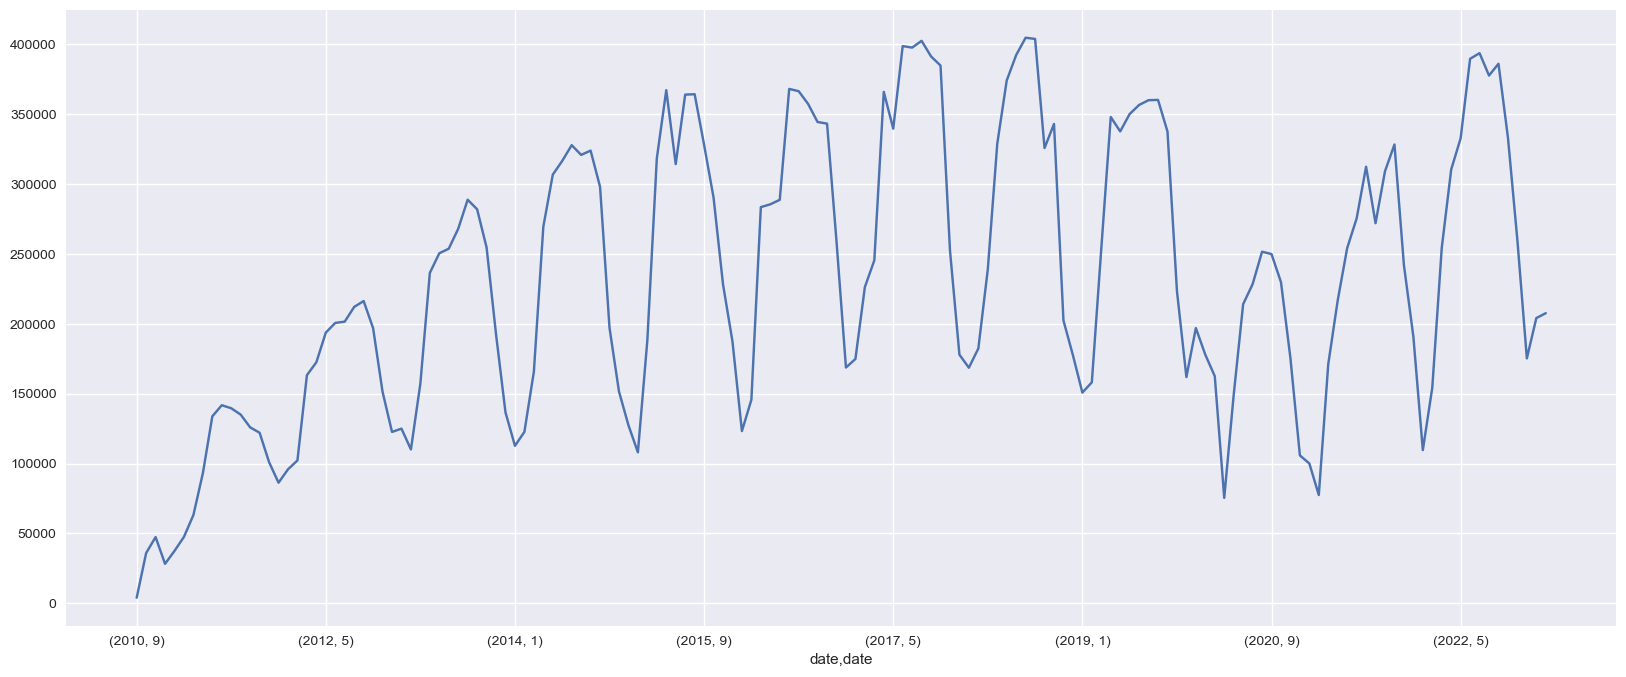

In [60]:


fig, axes = plt.subplots(1, 1, tight_layout=False, figsize = (20, 8))
#sns.histplot(x = df['date'], stat="count", color="Grey")

# set plt parameters
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (16.0, 10.0)

# convert to datetime
result.date = pd.to_datetime(result.date)

# groupby day, count and plot
g = result.groupby([result.date.dt.year, result.date.dt.month])["date"].count().plot.line()
#plt.xticks(rotation=90)


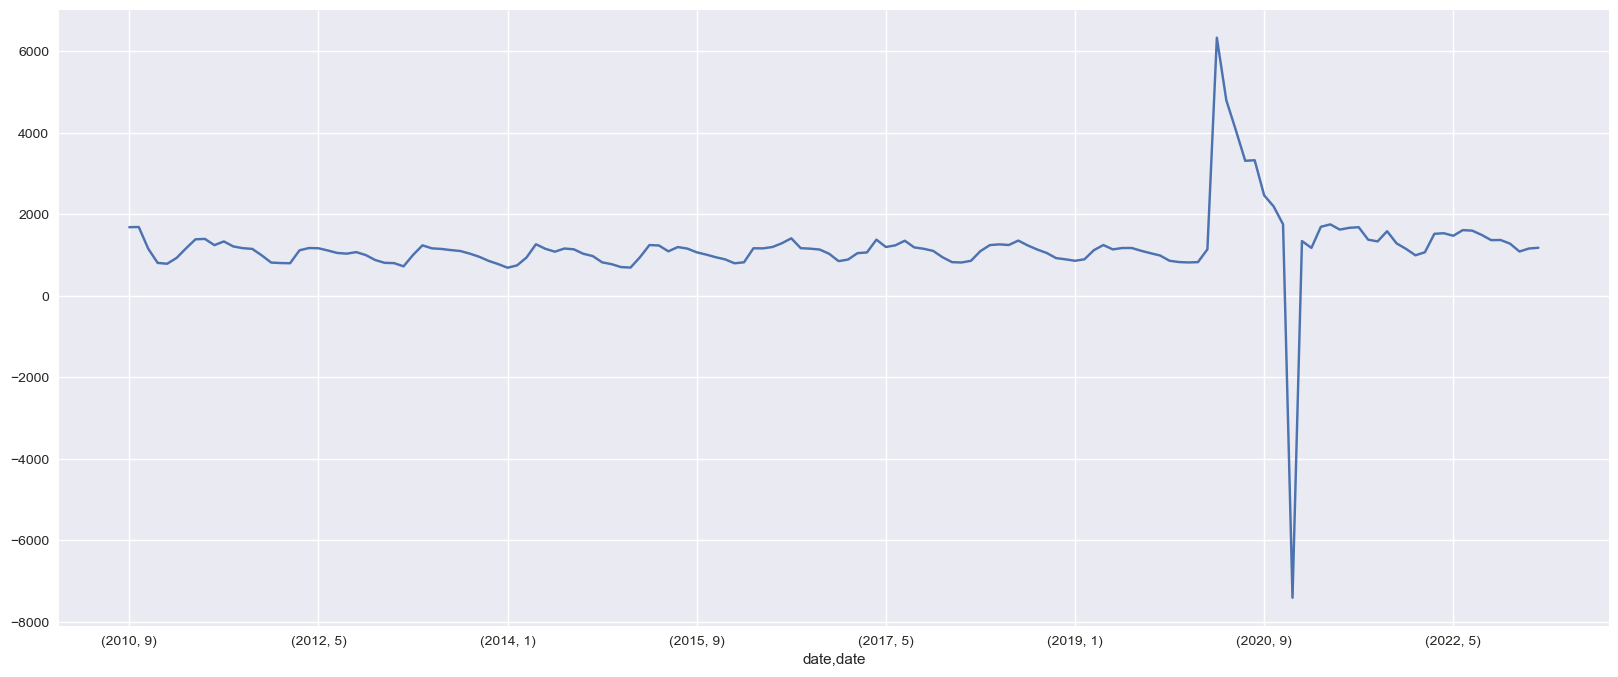

In [67]:
import seaborn as sns  #for data visualization operations
import matplotlib.pyplot as plt  #for data visualization operations

fig, axes = plt.subplots(1, 1, tight_layout=False, figsize = (20, 8))
#sns.histplot(x = df['date'], stat="count", color="Grey")

# set plt parameters
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (16.0, 10.0)

# convert to datetime
result.date = pd.to_datetime(result.date)

# groupby day, count and plot
g = result[result['filter'] == 0].groupby([result.date.dt.year, result.date.dt.month])["duration"].mean().plot.line()
#plt.xticks(rotation=90)
